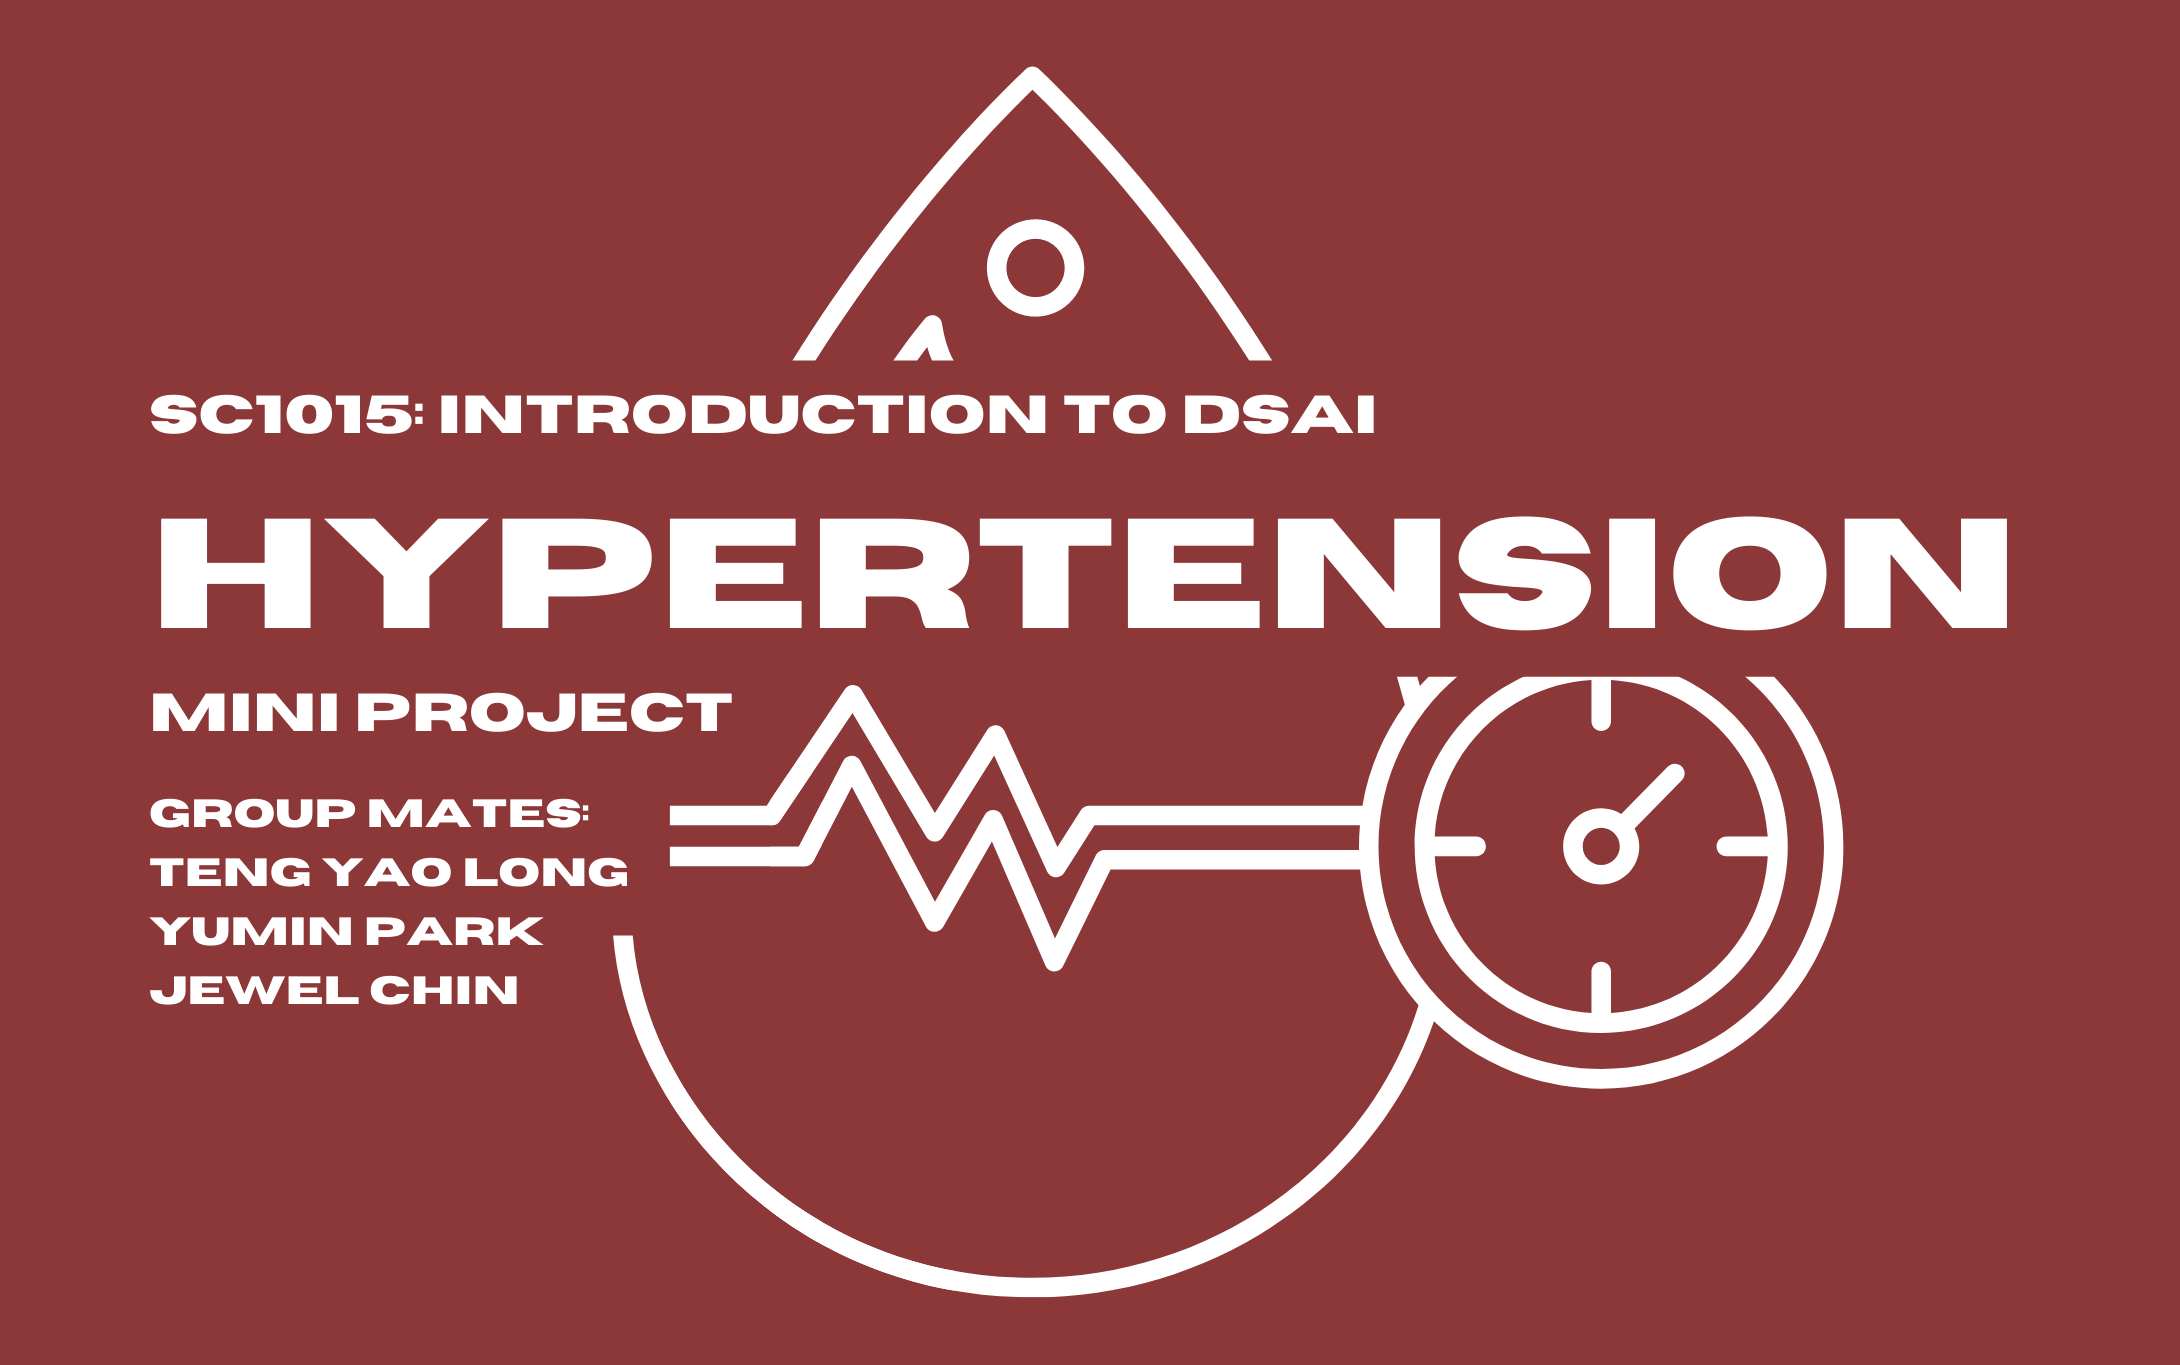

<div>
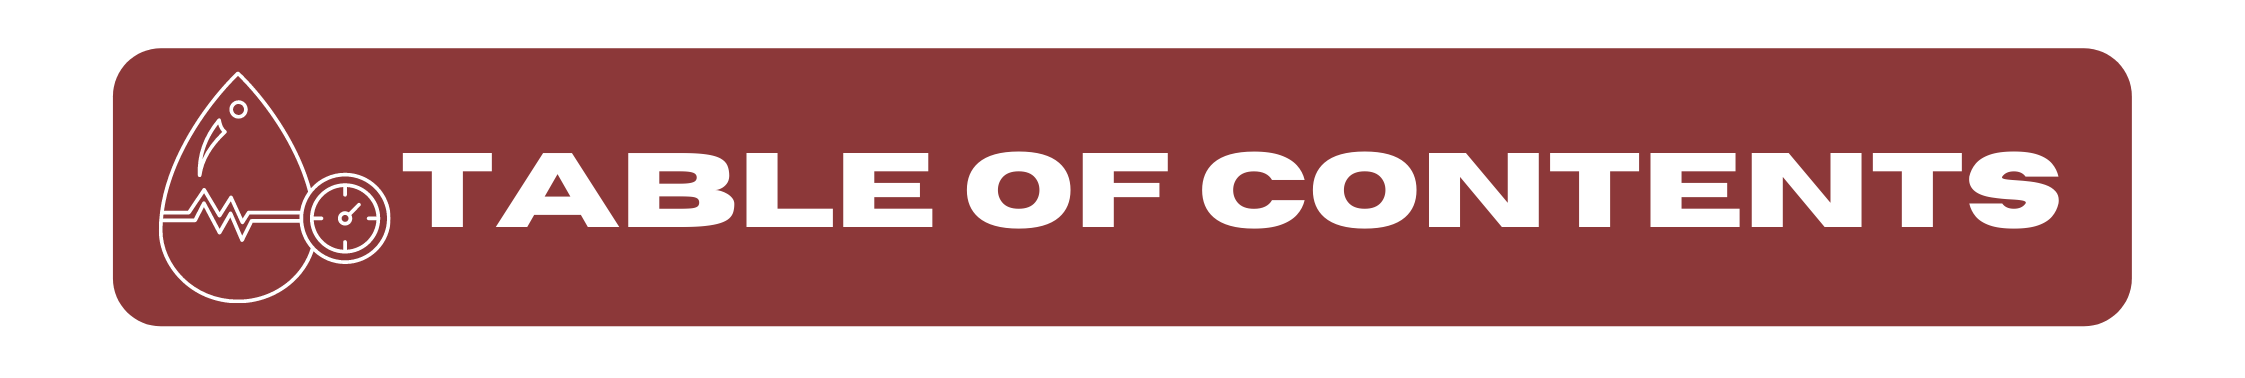
</div>
<a id='0'></a>
# 1. <a href='#1'>Introduction</a>
- 1.1 Libraries/Utilities <a href='#1.1'>Link</a>
- 1.2 Data Preprocessing <a href='#1.2'>Link</a>

# 2. <a href='#2'>Exploratory Data Analysis</a>

# 3. <a href='#3'>Data Balancing</a>

#  4. <a href='#4'>Modelling</a>
- 4.1  <a href='#4.1'>Logistic Regression</a>
- 4.2  <a href='#4.2'>Random Forest</a>
- 4.3  <a href='#4.3'>Support Vector Machine</a>
- 4.4  <a href='#4.4'>Artificial Neural Network</a>
- 4.5  <a href='#4.5'>eXtreme Gradient Boosting Classifier (XGBoost)</a>

# 5. <a href='#5'>Summary</a>

<a id='1'></a>
<div>
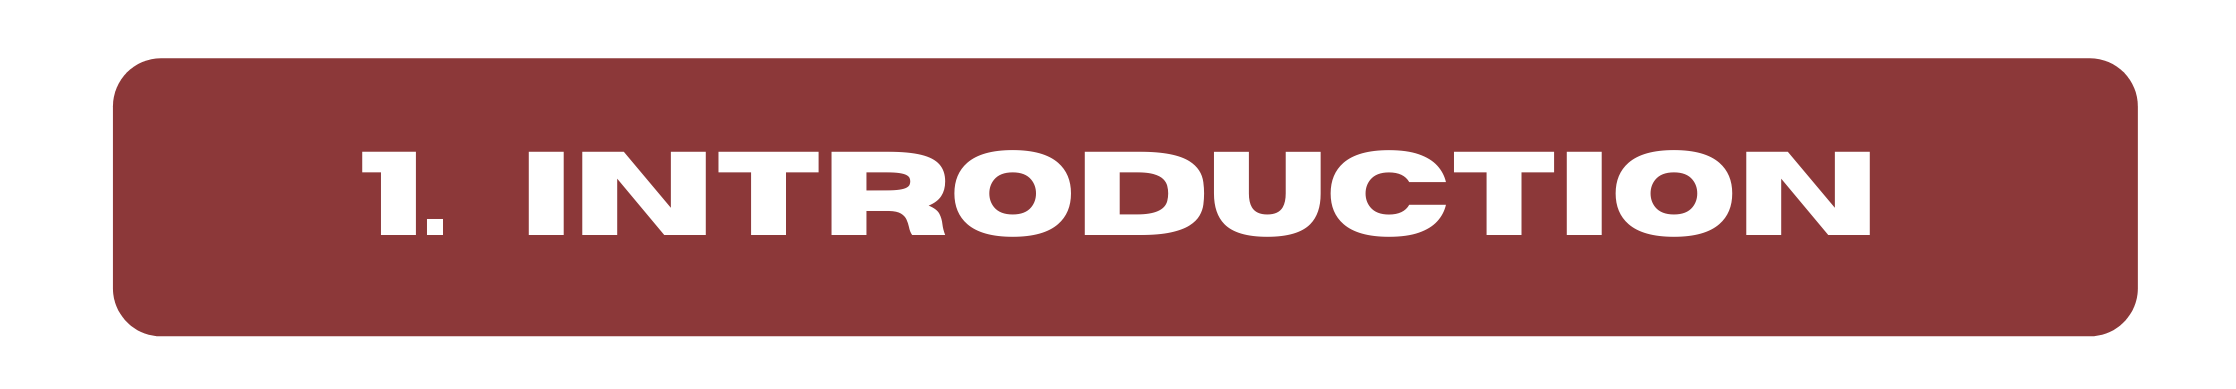
</div>

Hypertension(High blood pressure) is a common condition in which the long-term force of the blood against the artiries of an individual cases health problems. These health problems include the failure of bodyparts to function at expected level, hearth attack, and strokes. It is referred to as a "silent killer", as it tends to show no symptom until it has developed enough to pose serious health related concerns. What's more, nearly half of the Adults in America(47%, or 116 million) have hypertension, of which it was reported that high blood pressure was the leading cause of death in 516,995 people in America in 2019. Due to the prevalence of hypertension and its tendency to stay under the radar, it is of great importance to find it in its early stage. Hence our group decided to use various models to predict whether if an individual has hypertension, based on other health-related data. 

Sources:
https://www.mayoclinic.org/diseases-conditions/high-blood-pressure/symptoms-causes/syc-20373410
https://www.cdc.gov/bloodpressure/facts.htm#:~:text=Nearly%20half%20of%20adults%20in,are%20taking%20medication%20for%20hypertension.
https://www.mayoclinic.org/diseases-conditions/high-blood-pressure/in-depth/high-blood-pressure/art-20045868

<a id='1.1'></a>
<div>
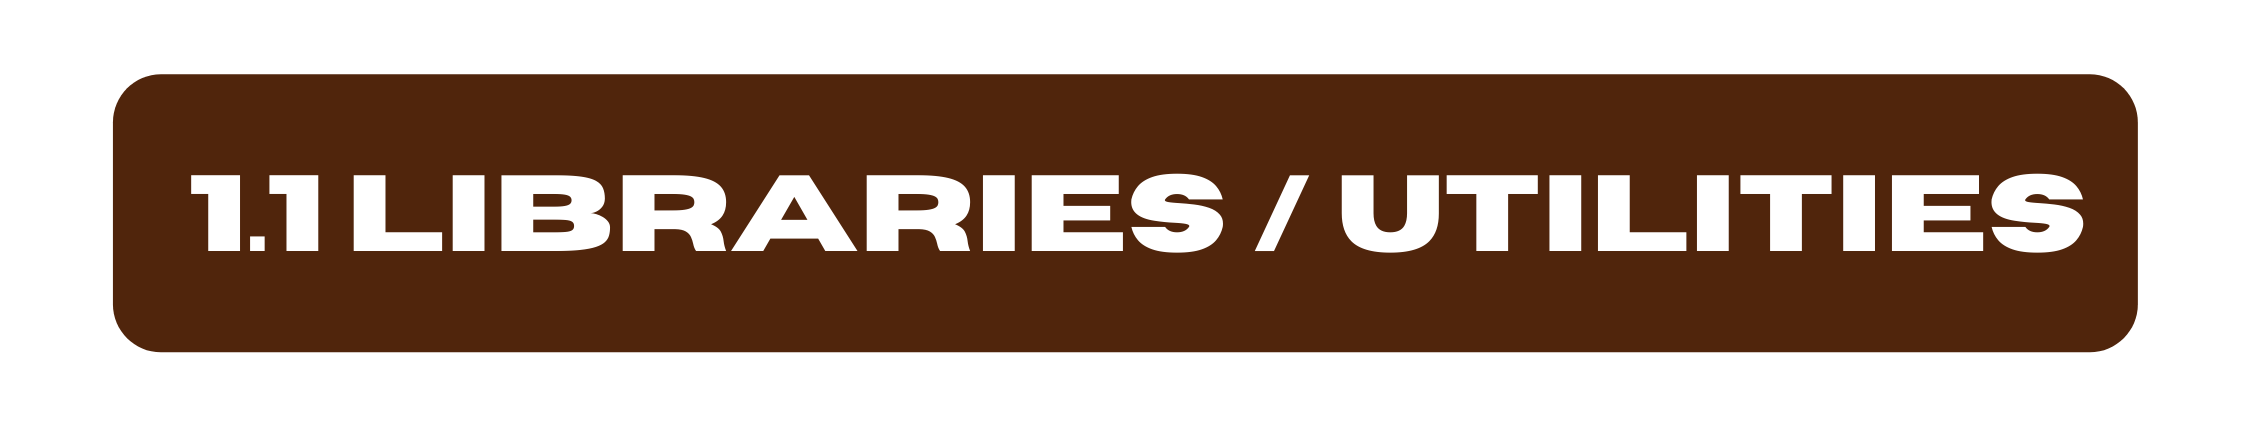
</div>

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as ex
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import plotly.figure_factory as ff
import warnings
warnings.filterwarnings('ignore')

import plotly.offline as pyo
pyo.init_notebook_mode()

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import classification_report,confusion_matrix,f1_score



<a id='1.2'></a>
<div>
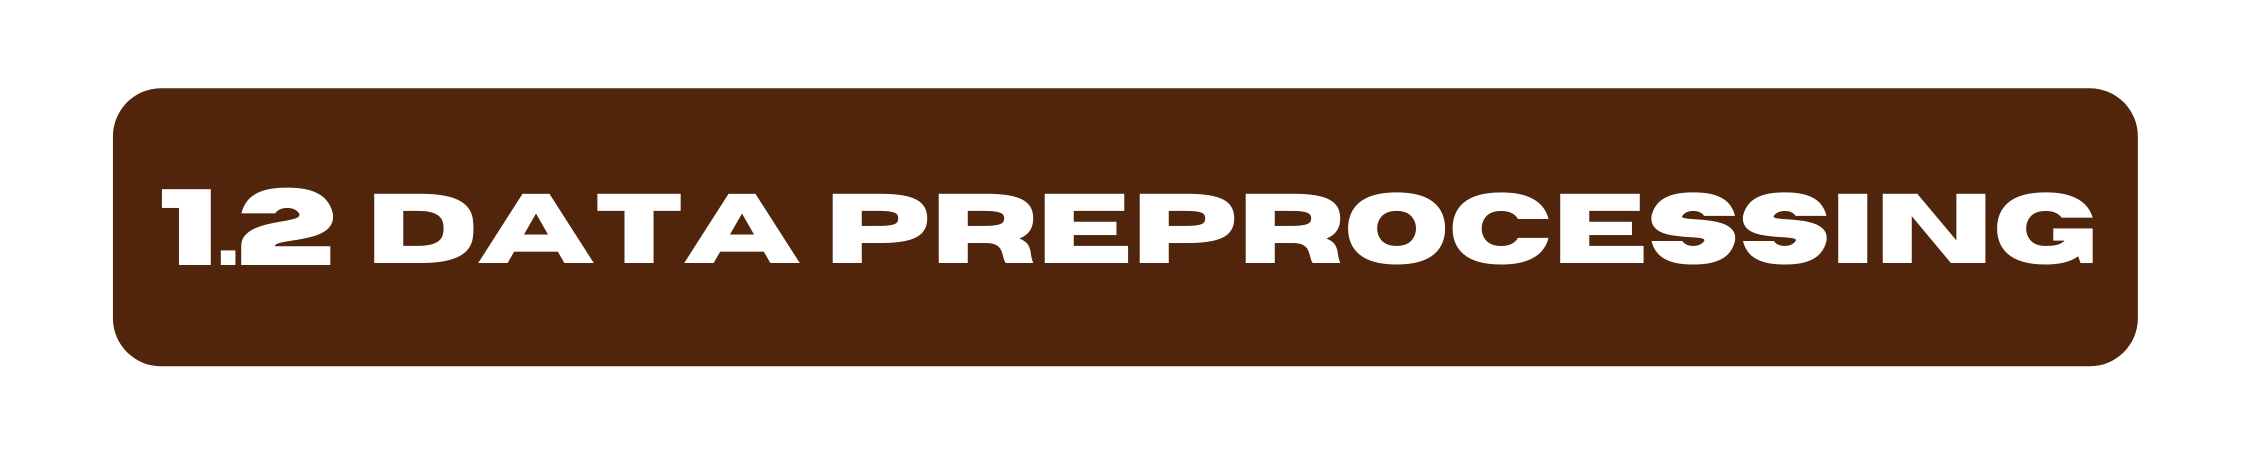
</div>

In [2]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df.head(10)

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   
5  56669    Male  81.0             0              0          Yes   
6  53882    Male  74.0             1              1          Yes   
7  10434  Female  69.0             0              0           No   
8  27419  Female  59.0             0              0          Yes   
9  60491  Female  78.0             0              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   
5        Private          Urban             186.21  29.0  formerly smoked   
6        Private          Rural              70.09  27.4     never smoked   
7        Private          Urban              94.39  22.8     never smoked   
8        Private          Rural              76.15   NaN          Unknown   
9        Private          Urban              58.57  24.2          Unknown   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  
5       1  
6       1  
7       1  
8       1  
9       1

<font color='blood red'><font size="5">With a quick look at our data, smoking_status has more than 2 categories which may be possible to generalise into 2 categories (smoked and never smoked). </font> 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


<font color='blue'><font size="5">We have 12 rows,
11 features and 1 label. <br  /> However we can omit id as a feature. Hence we currently 
have 10 features and 1 label to work with.

<font color='blood red'><font size="5">Numerical data: age, avg_glucose_level, bmi</font> 

<font color='blood red'><font size="5">Categorical data: gender, hypertension, heart_disease, ever_married, work_type, residence_type, smoking_status, stroke</font> 

In [4]:
# creating instance of labelencoder
le = LabelEncoder()
# Assigning numerical values and storing in another column
df['gender_Cat'] = le.fit_transform(df['gender'])
df['married_Cat'] = le.fit_transform(df['ever_married'])
df['worktype_Cat'] = le.fit_transform(df['work_type'])
df['Residence_type_Cat'] = le.fit_transform(df['Residence_type'])


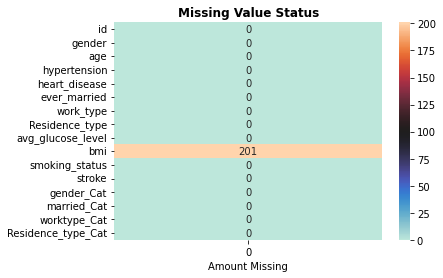

In [5]:
plt.title('Missing Value Status',fontweight='bold')
ax = sns.heatmap(df.isna().sum().to_frame(),annot=True,fmt='d',cmap='icefire')
ax.set_xlabel('Amount Missing')
plt.show()

<font color='blood red'><font size="5">As we can see, there are 201 missing data in bmi.</font> 

<a id='2'></a>
<div>
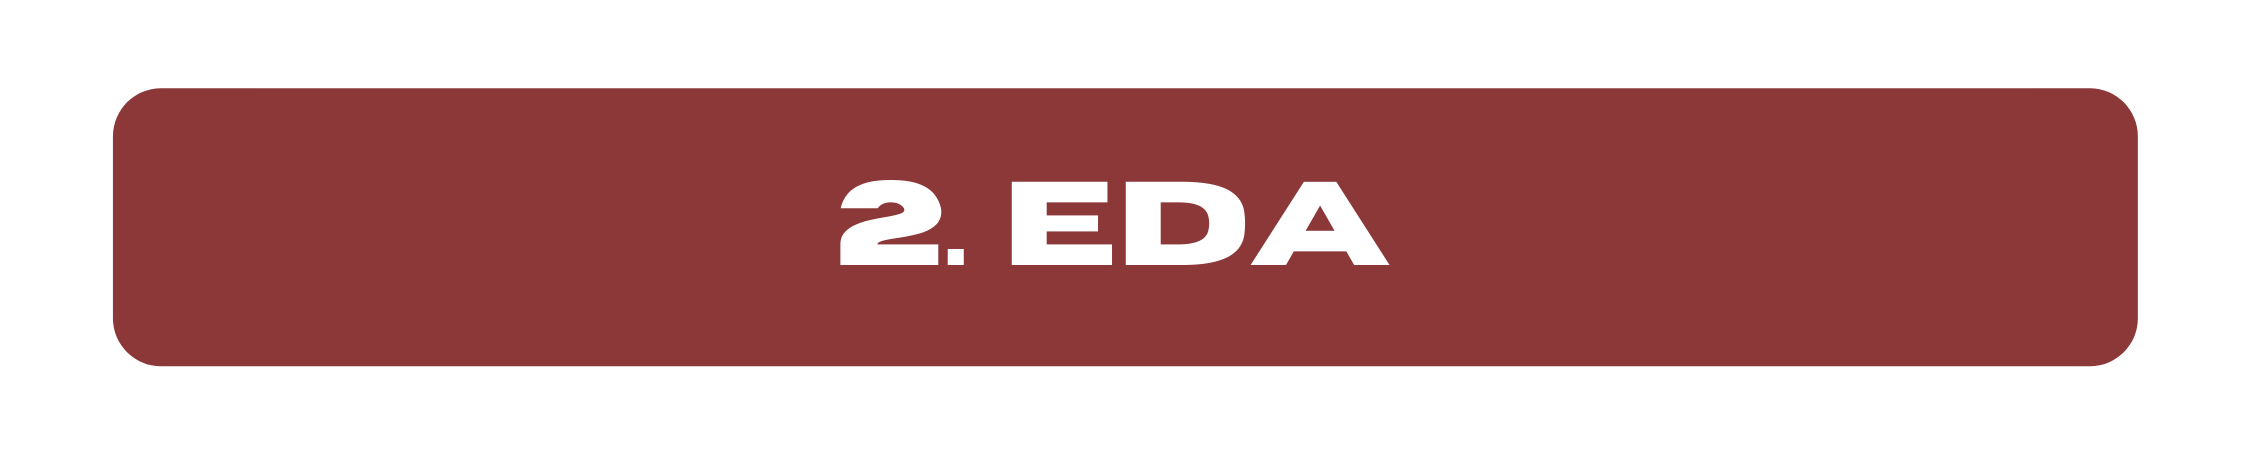
</div>

In [6]:
fig = ex.pie(df,names='hypertension')
fig.update_layout(title='<b>Proportion Of hyptertension Samples<b>')
fig.show()

<font color='blood red'><font size="5">As to be seen, the dataset is very imbalanced.</font><br />

<font color='blood red'><font size="5">We will need to deal with this imbalanced dataset later.</font>

# Feature: Smoking status

In [7]:
fig = ex.pie(df,names='smoking_status')
fig.update_layout(title='<b>Proportion Of Smoking Status Samples<b>')
fig.show()

In [8]:
len(df)

5110

<font color='blood red'><font size="5">Lets drop rows which has unknown smoking status</font>

In [9]:
df = df.drop(df[df['smoking_status']=='Unknown'].index)
len(df)

3566

In [10]:
fig = ex.pie(df,names='smoking_status')
fig.update_layout(title='<b>Proportion Of Smoking Status Samples<b>')
fig.show()

<font color='blood red'><font size="5">Let us combine formerly smoked and smokes to smokes</font>

In [11]:
df.loc[(df['smoking_status'] == 'formerly smoked'), 'smoking_status'] = 'smokes'

In [12]:
fig = ex.pie(df,names='smoking_status')
fig.update_layout(title='<b>Proportion Of Smoking Status Samples<b>')
fig.show()

In [13]:
#Encode smoke data
df['smoking_status_Cat'] = le.fit_transform(df['smoking_status'])

# Feature: BMI

<font color='blood red'><font size="5">Remember we had some missing values for bmi? Let us use predict it with a simple regression model with age, gender,  hypertension and avg_glucose_level to fill in the missing value instead of naively inputting it with the mean or median.

In [14]:
bmi_pipe = Pipeline( steps=[
                            ('scaler',StandardScaler()),
                            ('LinReg',LinearRegression())
                              ])
X = df[['age','avg_glucose_level','hypertension','bmi']].copy()


In [15]:

Missing = X[X.bmi.isna()]
X = X[~X.bmi.isna()]
Y = X.pop('bmi')
bmi_pipe.fit(X,Y)
predicted_bmi = pd.Series(bmi_pipe.predict(Missing[['age','avg_glucose_level','hypertension']]),index=Missing.index)
df.loc[Missing.index,'bmi'] = predicted_bmi

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3566 entries, 0 to 5108
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  3566 non-null   int64  
 1   gender              3566 non-null   object 
 2   age                 3566 non-null   float64
 3   hypertension        3566 non-null   int64  
 4   heart_disease       3566 non-null   int64  
 5   ever_married        3566 non-null   object 
 6   work_type           3566 non-null   object 
 7   Residence_type      3566 non-null   object 
 8   avg_glucose_level   3566 non-null   float64
 9   bmi                 3566 non-null   float64
 10  smoking_status      3566 non-null   object 
 11  stroke              3566 non-null   int64  
 12  gender_Cat          3566 non-null   int64  
 13  married_Cat         3566 non-null   int64  
 14  worktype_Cat        3566 non-null   int64  
 15  Residence_type_Cat  3566 non-null   int64  
 16  smokin

# Feature: Gender

In [17]:
df["gender"].value_counts()

Female    2158
Male      1407
Other        1
Name: gender, dtype: int64

<font color='blood red'><font size="5">Remove 'Other' Gender since it is very little<br /><br />

In [18]:
df.drop(df[df['gender'] == 'Other'].index, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3565 entries, 0 to 5108
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  3565 non-null   int64  
 1   gender              3565 non-null   object 
 2   age                 3565 non-null   float64
 3   hypertension        3565 non-null   int64  
 4   heart_disease       3565 non-null   int64  
 5   ever_married        3565 non-null   object 
 6   work_type           3565 non-null   object 
 7   Residence_type      3565 non-null   object 
 8   avg_glucose_level   3565 non-null   float64
 9   bmi                 3565 non-null   float64
 10  smoking_status      3565 non-null   object 
 11  stroke              3565 non-null   int64  
 12  gender_Cat          3565 non-null   int64  
 13  married_Cat         3565 non-null   int64  
 14  worktype_Cat        3565 non-null   int64  
 15  Residence_type_Cat  3565 non-null   int64  
 16  smokin

# Summary of features (.describe)

In [19]:
for i in ['age','avg_glucose_level', 'bmi']:
    print(df[i].describe())
    print("\n")

count    3565.000000
mean       48.860309
std        18.873140
min        10.000000
25%        34.000000
50%        50.000000
75%        63.000000
max        82.000000
Name: age, dtype: float64


count    3565.000000
mean      108.972376
std        48.295550
min        55.120000
25%        77.460000
50%        92.650000
75%       116.670000
max       271.740000
Name: avg_glucose_level, dtype: float64


count    3565.000000
mean       30.321527
std         7.160116
min        11.500000
25%        25.400000
50%        29.385942
75%        33.900000
max        92.000000
Name: bmi, dtype: float64




<font color='blood red'><font size="5">Let us remove some outliers with the 1.5 IQR Rule

In [20]:
IQR = df["avg_glucose_level"].quantile(0.75)-df["avg_glucose_level"].quantile(0.25)
upper = df["avg_glucose_level"].quantile(0.75)+1.5*IQR
lower = df["avg_glucose_level"].quantile(0.25)-1.5*IQR

IQR1 = df["bmi"].quantile(0.75)-df["bmi"].quantile(0.25)
upper1 = df["bmi"].quantile(0.75)+1.5*IQR1
lower1 = df["bmi"].quantile(0.25)-1.5*IQR1

index_out = df[(df["avg_glucose_level"]>upper) | (df["avg_glucose_level"]<lower) | (df["bmi"]>upper1) | (df["bmi"]<lower1) ].index
df.drop(index_out, inplace=True)

In [21]:
df.describe()

id          age  hypertension  heart_disease  \
count   2991.000000  2991.000000   2991.000000    2991.000000   
mean   36873.399866    46.978268      0.099967       0.048813   
std    21254.856077    18.798505      0.300006       0.215513   
min       67.000000    10.000000      0.000000       0.000000   
25%    18141.500000    32.000000      0.000000       0.000000   
50%    37545.000000    47.000000      0.000000       0.000000   
75%    55408.500000    61.000000      0.000000       0.000000   
max    72915.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke   gender_Cat  married_Cat  \
count        2991.000000  2991.000000  2991.000000  2991.000000  2991.000000   
mean           91.750461    29.258615     0.044801     0.386827     0.737546   
std            23.402486     5.972382     0.206902     0.487105     0.440042   
min            55.120000    14.100000     0.000000     0.000000     0.000000   
25%            74.870000    24.900000     0.000000     0.000000     0.000000   
50%            88.130000    28.700000     0.000000     0.000000     1.000000   
75%           103.850000    32.700000     0.000000     1.000000     1.000000   
max           175.290000    46.500000     1.000000     1.000000     1.000000   

       worktype_Cat  Residence_type_Cat  smoking_status_Cat  
count   2991.000000         2991.000000         2991.000000  
mean       1.917753            0.509863            0.463390  
std        0.925623            0.499986            0.498741  
min        0.000000            0.000000            0.000000  
25%        2.000000            0.000000            0.000000  
50%        2.000000            1.000000            0.000000  
75%        2.000000            1.000000            1.000000  
max        4.000000            1.000000            1.000000

<font color='blood red'><font size="5">Let us see the correlation matrices</font> 

In [22]:
fig = make_subplots(rows=2, cols=1,shared_xaxes=True,subplot_titles=('Pearson Correlation', 
                                                                     'Spearman Correlation'))
s_val = df.corr('pearson')
s_idx = s_val.index
s_col = s_val.columns
s_val = s_val.values
fig.add_trace(
    go.Heatmap(x=s_col,y=s_idx,z=s_val,name='pearson',showscale=False,xgap=1,ygap=1),
    row=1, col=1
)


s_val = df.corr('spearman')
s_idx = s_val.index
s_col = s_val.columns
s_val = s_val.values
fig.add_trace(
    go.Heatmap(x=s_col,y=s_idx,z=s_val,xgap=1,ygap=1),
    row=2, col=1
)

fig.update_layout(height=700, width=900, title_text="Correlations")
fig.show()

<font color='blood red'><font size="5">As to be seen, the numerical data that correlates most to hypertension are age, avg_glucose_level and bmi. <br /><br />
Lets observe hypertension sample distribution based on Bmi and glucose level and
Hypertension Sample Distribution Based On Bmi And Age.

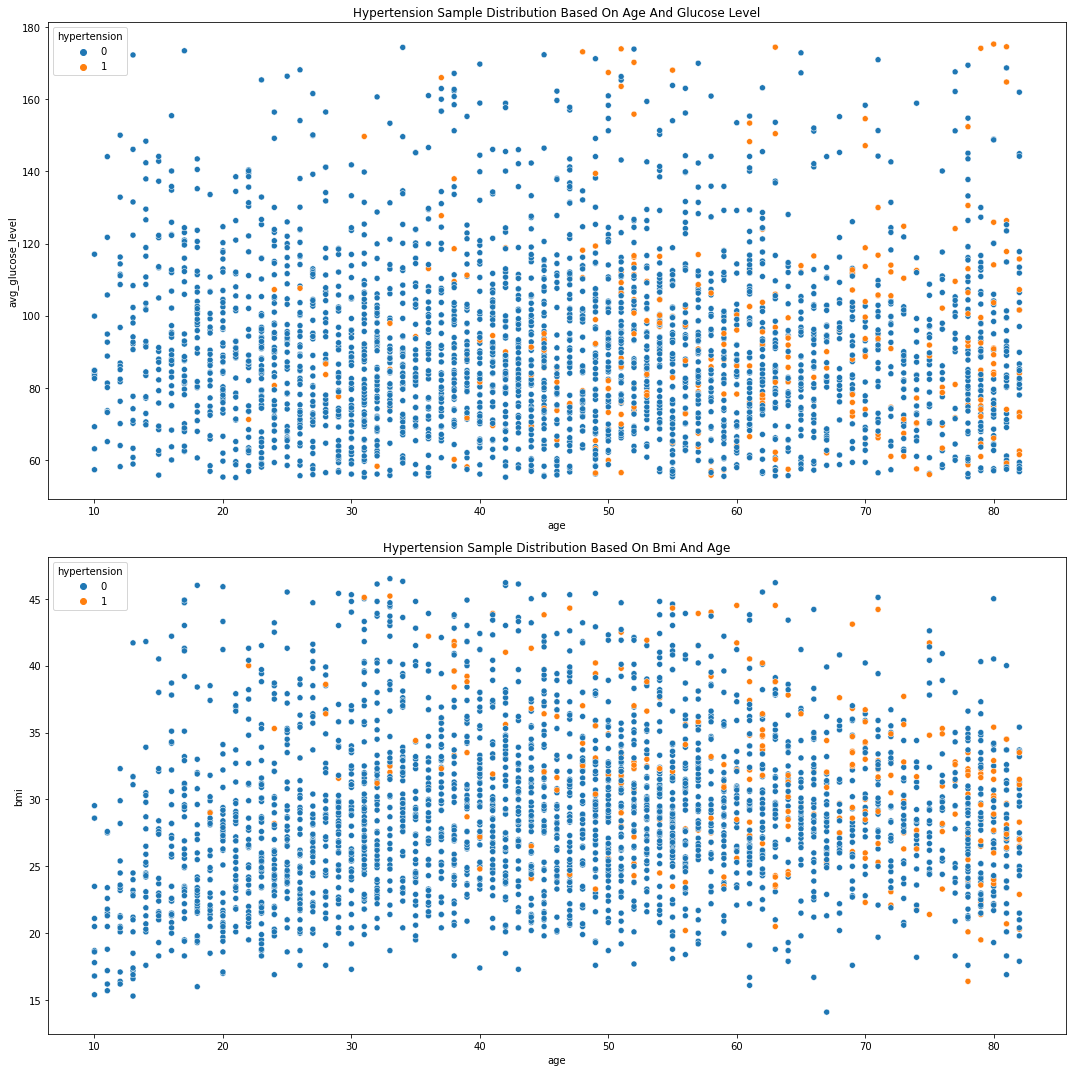

In [23]:
f, axs = plt.subplots(2,1,figsize=(15,15))

plt.subplot(2,1,1)
plt.title('Hypertension Sample Distribution Based On Age And Glucose Level')
sns.scatterplot(x=df['age'],y=df['avg_glucose_level'],hue=df['hypertension'])
plt.subplot(2,1,2)
plt.title('Hypertension Sample Distribution Based On Bmi And Age')
sns.scatterplot(x=df['age'],y=df['bmi'],hue=df['hypertension'])
plt.tight_layout()
plt.show()

<font color='blood red'><font size="5">Age is a very important factor in predicting hypertension

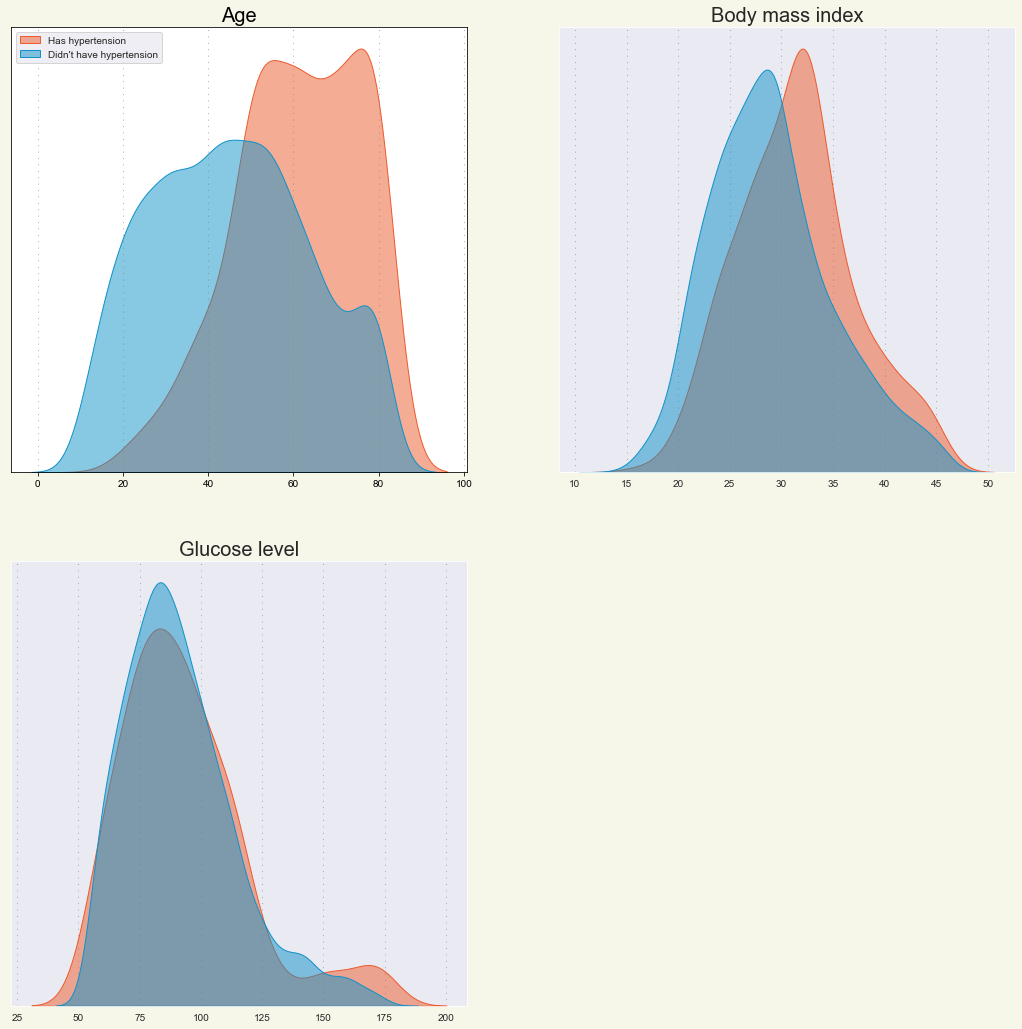

In [24]:
fig = plt.figure(figsize = (18, 18))
fig.patch.set_facecolor('#f6f6e9')

plt.subplot(221)
sns.set_style("dark")
plt.title('Age', size = 20)
sns.kdeplot(df.query('hypertension == 1')['age'], color = '#ed5b2d', shade = True, label = 'Has hypertension', alpha = 0.5)
sns.kdeplot(df.query('hypertension == 0')['age'], color = '#1092c9', shade = True, label = "Didn't have hypertension", alpha = 0.5)
plt.grid(color = 'gray', linestyle = ':', axis = 'x', zorder = 0,  dashes = (1,7))
plt.ylabel('')
plt.xlabel('')
plt.yticks([])
plt.legend(loc = 'upper left')

plt.subplot(222)
plt.title('Body mass index', size = 20)
sns.kdeplot(df.query('hypertension == 1')['bmi'], color = '#ed5b2d', shade = True, label = 'Has hypertension', alpha = 0.5)
sns.kdeplot(df.query('hypertension == 0')['bmi'], color = '#1092c9', shade = True, label = "Didn't have hypertension", alpha = 0.5)
plt.grid(color = 'gray', linestyle = ':', axis = 'x', zorder = 0,  dashes = (1,7))
plt.ylabel('')
plt.xlabel('')
plt.yticks([])
plt.legend('').set_visible(False)

plt.subplot(223)
plt.title('Glucose level', size = 20)
sns.kdeplot(df.query('hypertension == 1')['avg_glucose_level'], color = '#ed5b2d', shade = True, label = 'Has hypertenson', alpha = 0.5)
sns.kdeplot(df.query('hypertension == 0')['avg_glucose_level'], color = '#1092c9', shade = True, label = "Didn't have hypertension", alpha = 0.5)
plt.grid(color = 'gray', linestyle = ':', axis = 'x', zorder = 0,  dashes = (1,7))
plt.ylabel('')
plt.xlabel('')
plt.yticks([])
plt.legend('').set_visible(False)

plt.show()

<font color='blood red'><font size="5">
KDE plot insights


The kde shows the density of the feature for each value of the target. There are usually 2 colored humps representing the 2 values of TARGET. If the humps are well-separated and non-overlapping, then there is a correlation with the TARGET. If the humps are overlapping a lot, then that means the feature is not well-correlated with the TARGET, because the TARGET is equally as common on those values of the feature.

From this understanding, age has correlation with hyptension while body mass index has less correlation and glucose levl has the least correlation with hypertension.

- above the age of 40, one is very likely to have hypertension especially above 50s.
  possible relationship between age and hypertension.


- BMI cannot tell anything (explore more later)

- glucose level < 140 is where one is very likely to not have hypertension. note: this is the range for a normal, healthy person.

- glucose level > 150 is where one is more likely to have hypertension.
  At around glucose level > 200 is where one is more likely to have hypertension.  
  Note: this is the range where one is considered diabetic. 

- possible relationship between glucose levels and hypertension.



In [25]:
stroke = df.copy()
# Create age groups
stroke['age_group'] = 0
for i in range(len(stroke.index)):
    if stroke.iloc[i, 2] < 2:
        stroke.iloc[i, 17] = 'baby'
    elif stroke.iloc[i, 2] < 17 and stroke.iloc[i, 2] >= 2:
        stroke.iloc[i, 17] = 'child'
    elif stroke.iloc[i, 2] < 30 and stroke.iloc[i, 2] >= 17:
        stroke.iloc[i, 17] = 'young adults'
    elif stroke.iloc[i, 2] < 60 and stroke.iloc[i, 2] >= 30:
        stroke.iloc[i, 17] = 'middle-aged adults'
    elif stroke.iloc[i, 2] < 80 and stroke.iloc[i, 2] >= 60:
        stroke.iloc[i, 17] = 'old-aged adults'
    else:
        stroke.iloc[i, 17] = 'long-lived'
        
# Create bmi groups
stroke['bmi_group'] = 0
for i in range(len(stroke.index)):
    if stroke.iloc[i, 9] < 18.5:
        stroke.iloc[i, 18] = 'Underweight'
    elif stroke.iloc[i, 9] < 25.0 and stroke.iloc[i, 9] >= 18.5:
        stroke.iloc[i, 18] = 'Normal weight'
    elif stroke.iloc[i, 9] < 30.0 and stroke.iloc[i, 9] >= 25.0:
        stroke.iloc[i, 18] = 'Overweight'
    else:
        stroke.iloc[i, 18] = 'Obese'
        
# Create glucose groups
stroke['glucose_group'] = 0
for i in range(len(stroke.index)):
    if stroke.iloc[i, 8] < 100:
        stroke.iloc[i, 19] = 'Normal'
    elif stroke.iloc[i, 8] >= 100 and stroke.iloc[i, 8] < 125:
        stroke.iloc[i, 19] = 'Prediabetes'
    else:
        stroke.iloc[i, 19] = 'Diabetes'

In [26]:
# Grouping by categorical features
dst_st_age = stroke.groupby(['age_group', 'hypertension']).agg({'hypertension': 'count'}).rename(columns = {'hypertension': 'count'}).reset_index()
stroke1 = stroke.groupby(['stroke', 'hypertension']).agg({'hypertension': 'count'}).rename(columns = {'hypertension': 'count'}).reset_index()
heart = stroke.groupby(['heart_disease', 'hypertension']).agg({'hypertension': 'count'}).rename(columns = {'hypertension': 'count'}).reset_index()
marry = stroke.groupby(['ever_married', 'hypertension']).agg({'hypertension': 'count'}).rename(columns = {'hypertension': 'count'}).reset_index()
work = stroke.groupby(['work_type', 'hypertension']).agg({'hypertension': 'count'}).rename(columns = {'hypertension': 'count'}).reset_index()
residence = stroke.groupby(['Residence_type', 'hypertension']).agg({'hypertension': 'count'}).rename(columns = {'hypertension': 'count'}).reset_index()
glucose_group = stroke.groupby(['glucose_group', 'hypertension']).agg({'hypertension': 'count'}).rename(columns = {'hypertension': 'count'}).reset_index()
bmi_group = stroke.groupby(['bmi_group', 'hypertension']).agg({'hypertension': 'count'}).rename(columns = {'hypertension': 'count'}).reset_index()
smoking = stroke.query('smoking_status != "Unknown"').groupby(['smoking_status', 'hypertension']).agg({'hypertension': 'count'})\
.rename(columns = {'hypertension': 'count'}).reset_index()

# Create percent column for data frames
def percent(data):
    data['percent'] = 0
    for i in range(len(data.index)):
        if i < len(data.index)-1:
            if data.iloc[i, 0] == data.iloc[i+1, 0]:
                data.iloc[i, 3] = round((data.iloc[i, 2] / (data.iloc[i, 2] + data.iloc[i+1, 2])) * 100, 1)
            elif data.iloc[i, 0] == data.iloc[i-1, 0]:
                data.iloc[i, 3] = 100 - data.iloc[i-1, 3]
            else:
                data.iloc[i, 3] = 100.0
        else:
            if data.iloc[i, 0] == data.iloc[i-1, 0]:
                data.iloc[i, 3] = 100 - data.iloc[i-1, 3]
            else:
                data.iloc[i, 3] = 100.0
            
percent(dst_st_age)
percent(stroke1)
percent(heart)
percent(marry)
percent(work)
percent(residence)
percent(glucose_group)
percent(bmi_group)
percent(smoking)


In [27]:
bmi_group.head()

bmi_group  hypertension  count  percent
0  Normal weight             0    665     94.3
1  Normal weight             1     40      5.7
2          Obese             0   1022     85.0
3          Obese             1    181     15.0
4     Overweight             0    960     92.6

In [28]:
stroke.head(20)

id  gender   age  hypertension  heart_disease ever_married  \
2   31112    Male  80.0             0              1          Yes   
3   60182  Female  49.0             0              0          Yes   
4    1665  Female  79.0             1              0          Yes   
6   53882    Male  74.0             1              1          Yes   
7   10434  Female  69.0             0              0           No   
10  12109  Female  81.0             1              0          Yes   
11  12095  Female  61.0             0              1          Yes   
12  12175  Female  54.0             0              0          Yes   
15  58202  Female  50.0             1              0          Yes   
18  27458  Female  60.0             0              0           No   
24   4219    Male  71.0             0              0          Yes   
25  70822    Male  80.0             0              0          Yes   
26  38047  Female  65.0             0              0          Yes   
34  14248    Male  48.0             0              0           No   
35    712  Female  82.0             1              1           No   
37  24977  Female  72.0             1              0          Yes   
39  62602  Female  49.0             0              0          Yes   
40   4651    Male  78.0             0              0          Yes   
41   1261    Male  54.0             0              0          Yes   
42  61960    Male  82.0             0              1          Yes   

        work_type Residence_type  avg_glucose_level   bmi smoking_status  \
2         Private          Rural             105.92  32.5   never smoked   
3         Private          Urban             171.23  34.4         smokes   
4   Self-employed          Rural             174.12  24.0   never smoked   
6         Private          Rural              70.09  27.4   never smoked   
7         Private          Urban              94.39  22.8   never smoked   
10        Private          Rural              80.43  29.7   never smoked   
11       Govt_job          Rural             120.46  36.8         smokes   
12        Private          Urban             104.51  27.3         smokes   
15  Self-employed          Rural             167.41  30.9   never smoked   
18        Private          Urban              89.22  37.8   never smoked   
24        Private          Urban             102.87  27.2         smokes   
25  Self-employed          Rural             104.12  23.5   never smoked   
26        Private          Rural             100.98  28.2         smokes   
34       Govt_job          Urban              84.20  29.7   never smoked   
35        Private          Rural              84.03  26.5         smokes   
37        Private          Rural              74.63  23.1         smokes   
39        Private          Urban              60.91  29.9   never smoked   
40        Private          Rural              78.03  23.9         smokes   
41        Private          Urban              71.22  28.5   never smoked   
42        Private          Urban             144.90  26.4         smokes   

    stroke  gender_Cat  married_Cat  worktype_Cat  Residence_type_Cat  \
2        1           1            1             2                   0   
3        1           0            1             2                   1   
4        1           0            1             3                   0   
6        1           1            1             2                   0   
7        1           0            0             2                   1   
10       1           0            1             2                   0   
11       1           0            1             0                   0   
12       1           0            1             2                   1   
15       1           0            1             3                   0   
18       1           0            0             2                   1   
24       1           1            1             2                   1   
25       1           1            1             3                   0   
26       1 

In [29]:
dst_st_age

age_group  hypertension  count  percent
0               child             0    132    100.0
1          long-lived             0     82     73.2
2          long-lived             1     30     26.8
3  middle-aged adults             0   1413     91.9
4  middle-aged adults             1    124      8.1
5     old-aged adults             0    572     80.7
6     old-aged adults             1    137     19.3
7        young adults             0    493     98.4
8        young adults             1      8      1.6

In [30]:
dst_st_age.iloc[[2,4,6,8], 1] = "Had hypertension"
dst_st_age.iloc[[0,1,3,5,7], 1] = "Didn't have hypertension"

stroke1.iloc[[0,1], 0] = 'No stroke'
stroke1.iloc[[2,3], 0] = 'Stroke'

heart.iloc[[0,1], 0] = 'No heart diseases'
heart.iloc[[2,3], 0] = 'Heart diseases'

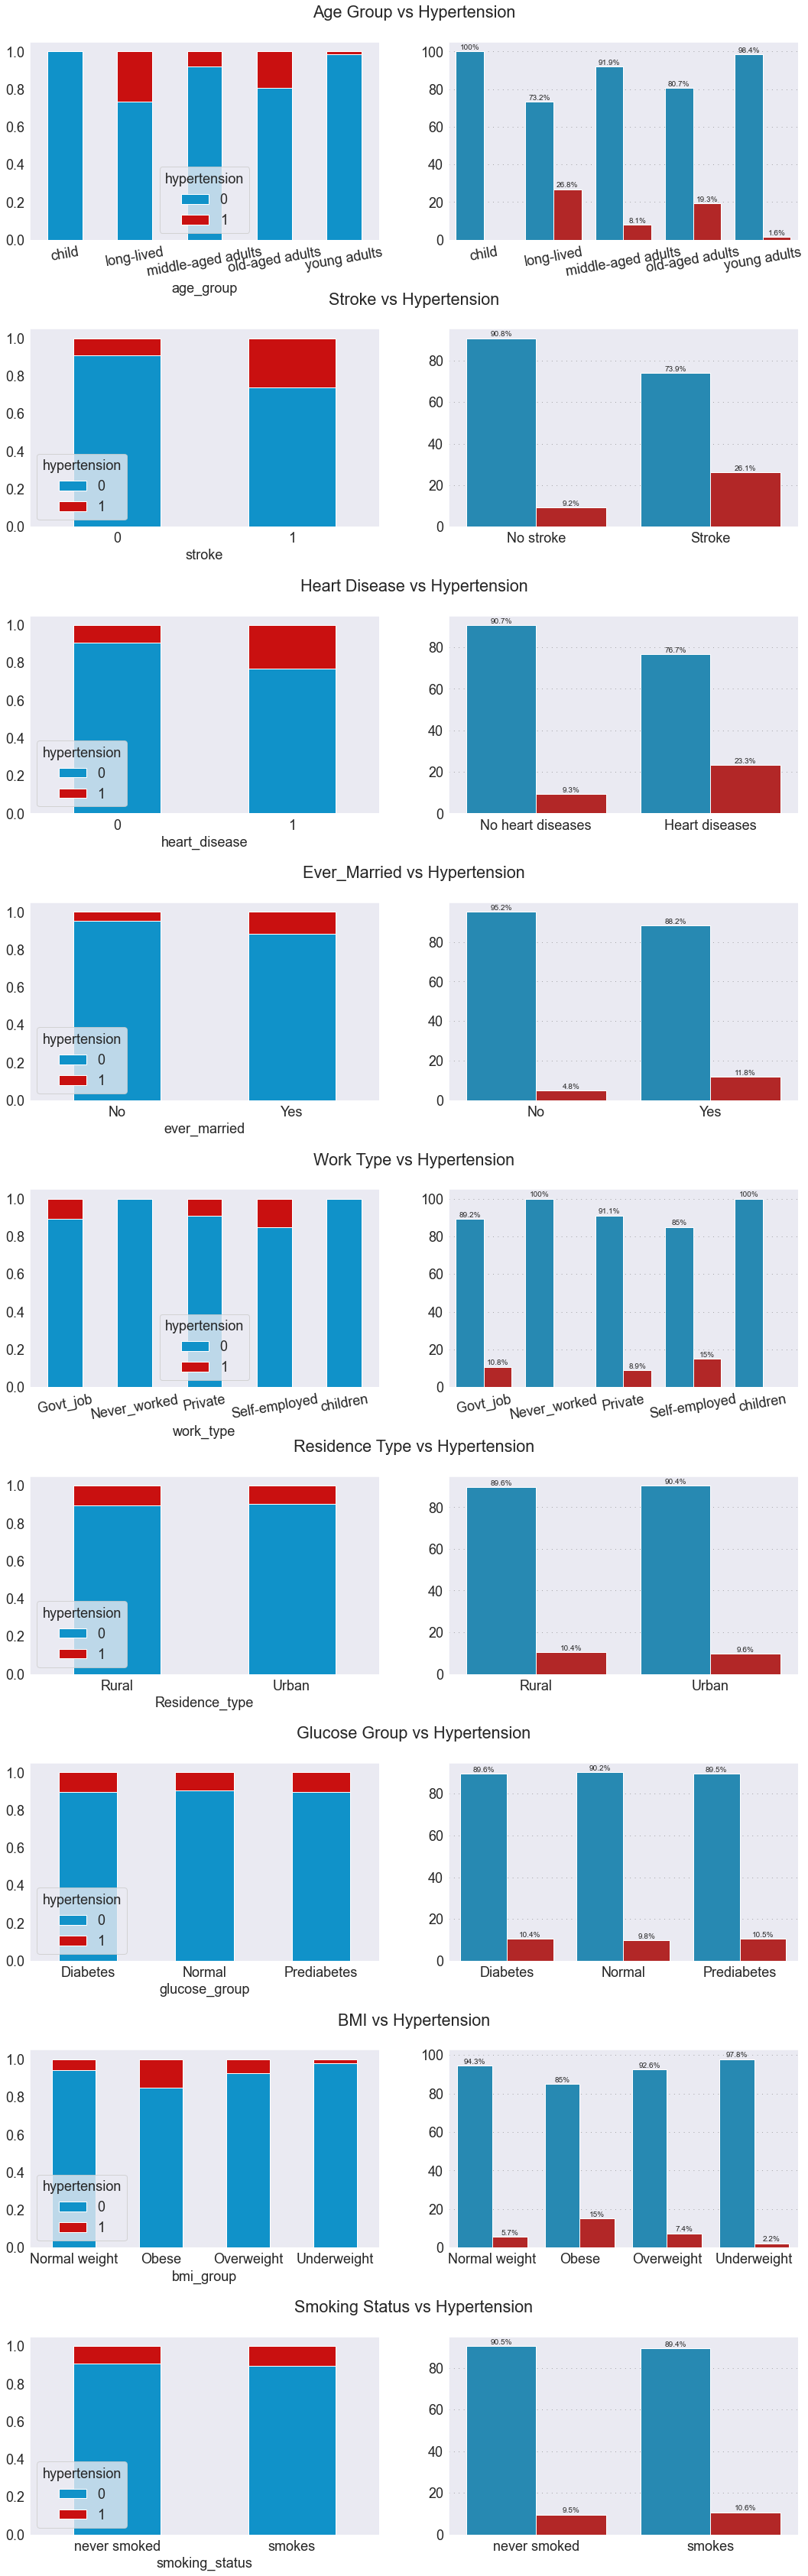

In [31]:
plt.rcParams['figure.figsize'] = 7, 5
plt.rcParams.update({'font.size': 18})
ax.tick_params(labelrotation=45)
fig.tight_layout()
fig.patch.set_facecolor('#fafafa')
f, axes = plt.subplots(9, 2, figsize=(18,60))
f.subplots_adjust(hspace=.45)


table=pd.crosstab(stroke.age_group,stroke.hypertension)
a=table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True,ax = axes[0,0],  color = ['#1092c9','#c91010'],rot = 10)
axes[0,0].set_title('Age Group vs Hypertension', y=1.1 , x=1.1)
plt.subplot(9,2,2)
plt.grid(color = 'gray', linestyle = ':', axis = 'y', zorder = 0,  dashes = (1,7))
a2 = sns.barplot(data = dst_st_age, x = dst_st_age['age_group'], y = dst_st_age['percent'], hue = dst_st_age['hypertension'], palette = ['#1092c9','#c91010',])
plt.xticks(rotation = 10)
plt.ylabel('')
plt.xlabel('')
plt.legend('').set_visible(False)

##########

table=pd.crosstab(stroke.stroke,stroke.hypertension)
b=table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True,ax = axes[1,0],  color = ['#1092c9','#c91010',],rot=0)
axes[1,0].set_title('Stroke vs Hypertension', y=1.1 , x=1.1)
plt.subplot(9,2,4)
plt.grid(color = 'gray', linestyle = ':', axis = 'y', zorder = 0,  dashes = (1,7))
b2 = sns.barplot(data = stroke1, x = stroke1['stroke'], y = stroke1['percent'], hue = stroke1['hypertension'], palette = ['#1092c9','#c91010',])
plt.ylabel('')
plt.xlabel('')
plt.legend('').set_visible(False)

##########

table=pd.crosstab(stroke.heart_disease,stroke.hypertension)
c=table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True,ax = axes[2,0], color = ['#1092c9','#c91010',],rot=0)
axes[2,0].set_title('Heart Disease vs Hypertension', y=1.1 , x=1.1)
plt.subplot(9,2,6)
plt.grid(color = 'gray', linestyle = ':', axis = 'y', zorder = 0,  dashes = (1,7))
c2 = sns.barplot(data = heart, x = heart['heart_disease'], y = heart['percent'], hue = heart['hypertension'], palette = ['#1092c9','#c91010',])
plt.ylabel('')
plt.xlabel('')
plt.legend('').set_visible(False)

##########
table=pd.crosstab(stroke.ever_married,stroke.hypertension)
d=table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True,ax = axes[3,0], color = ['#1092c9','#c91010',],rot=0)
axes[3,0].set_title('Ever_Married vs Hypertension', y=1.1 , x=1.1)
plt.subplot(9,2,8)
plt.grid(color = 'gray', linestyle = ':', axis = 'y', zorder = 0,  dashes = (1,7))
d2 = sns.barplot(data = marry, x = marry['ever_married'], y = marry['percent'], hue = marry['hypertension'], palette = ['#1092c9','#c91010'])
plt.ylabel('')
plt.xlabel('')
plt.legend('').set_visible(False)
##########
table=pd.crosstab(stroke.work_type,stroke.hypertension)
e=table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True,ax = axes[4,0], color = ['#1092c9','#c91010',],rot=10)
axes[4,0].set_title('Work Type vs Hypertension', y=1.1 , x=1.1)
plt.subplot(9,2,10)
plt.grid(color = 'gray', linestyle = ':', axis = 'y', zorder = 0,  dashes = (1,7))
e2 = sns.barplot(data = work, x = work['work_type'], y = work['percent'], hue = work['hypertension'], palette = ['#1092c9','#c91010'])
plt.ylabel('')
plt.xlabel('')
plt.xticks(rotation = 10)
plt.legend('').set_visible(False)
##########
table=pd.crosstab(stroke.Residence_type,stroke.hypertension)
f=table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True,ax = axes[5,0], color = ['#1092c9','#c91010',],rot=0)
axes[5,0].set_title('Residence Type vs Hypertension', y=1.1 , x=1.1)
plt.ylabel('')
plt.xlabel('')
plt.legend('').set_visible(False)

plt.subplot(9,2,12)
plt.grid(color = 'gray', linestyle = ':', axis = 'y', zorder = 0,  dashes = (1,7))
f2 = sns.barplot(data = residence, x = residence['Residence_type'], y = residence['percent'], hue = residence['hypertension'], palette = ['#1092c9','#c91010'])
plt.ylabel('')
plt.xlabel('')
plt.legend('').set_visible(False)
##########

table=pd.crosstab(stroke.glucose_group,stroke.hypertension)
g=table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True,ax = axes[6,0], color = ['#1092c9','#c91010'],rot=0)
axes[6,0].set_title('Glucose Group vs Hypertension', y=1.1 , x=1.1)
plt.subplot(9,2,14)
plt.grid(color = 'gray', linestyle = ':', axis = 'y', zorder = 0,  dashes = (1,7))
g2 = sns.barplot(data = glucose_group, x = glucose_group['glucose_group'], y = glucose_group['percent'], hue = glucose_group['hypertension'], palette = ['#1092c9','#c91010'])
plt.ylabel('')
plt.xlabel('')
plt.legend('').set_visible(False)
##########
table=pd.crosstab(stroke.bmi_group,stroke.hypertension)
h=table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True,ax = axes[7,0],color = ['#1092c9','#c91010'],rot=0)
axes[7,0].set_title('BMI vs Hypertension', y=1.1 , x=1.1)
plt.subplot(9,2,16)
plt.grid(color = 'gray', linestyle = ':', axis = 'y', zorder = 0,  dashes = (1,7))
h2 = sns.barplot(data = bmi_group, x = bmi_group['bmi_group'], y = bmi_group['percent'], hue = bmi_group['hypertension'], palette = ['#1092c9','#c91010'])
plt.ylabel('')
plt.xlabel('')
plt.legend('').set_visible(False)
##########
table=pd.crosstab(stroke.smoking_status, stroke.hypertension)
j=table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True,ax = axes[8,0],color = ['#1092c9','#c91010'],rot=0)
axes[8,0].set_title('Smoking Status vs Hypertension', y=1.1 , x=1.1)
plt.subplot(9,2,18)
plt.grid(color = 'gray', linestyle = ':', axis = 'y', zorder = 0,  dashes = (1,7))
j2 = sns.barplot(data = smoking, x = smoking['smoking_status'], y = smoking['percent'], hue = smoking['hypertension'], palette = ['#1092c9','#c91010'])
plt.ylabel('')
plt.xlabel('')
plt.legend('').set_visible(False)
##########
# add annotations

for i in [a2,b2,c2,d2,e2,f2,g2,h2,j2]:
    for p in i.patches:
        height = p.get_height()
        i.annotate(f'{height:g}%', (p.get_x() + p.get_width() / 2, p.get_height()), 
                   ha = 'center', va = 'center', 
                   size = 10,
                   xytext = (0, 5), 
                   textcoords = 'offset points')
        
plt.show()

<font color='blood red'><font size="5">based on barplots <br /><br />

1) Age Group

 - long-lived and middle-aged adults are more likely to have hypertension.
 - strong correlation between age group and hypertension.

2) Stroke and Heart Diseases
- strong correlation between stroke and hypertension.
- strong correlation between heart diseases and hypertension.
- However, this can still happen to those who did not have stroke or heart diseases given available data.

3) Ever Married
- weak correlation between marriage status and hypertension.
- if ever married, there is higher risk of hypertension.

4) Work Type
- percentages for govt job, private and self-employed are very similar.
- note that the data is very imbalanced. (alot of private, everything else very little)
- hard to check relationship as there are only 14 who never worked, which is a stark difference in data amount compared to the rest.

5) Residence Type
- residence type do not seem to affect since the percentages are quite similar.
- not much correlation.

6) Glucose Group
- those with diabetes are more likely to have hypertension.
- strong correlation between glucose levels and hypertension.

7) BMI
- those who are obese are more likely to have hypertension.
- strong correlation between bmi and hypertension.

8) Smoking
- smoking do not seem to affect since the percentages are quite similar.
- not much correlation.

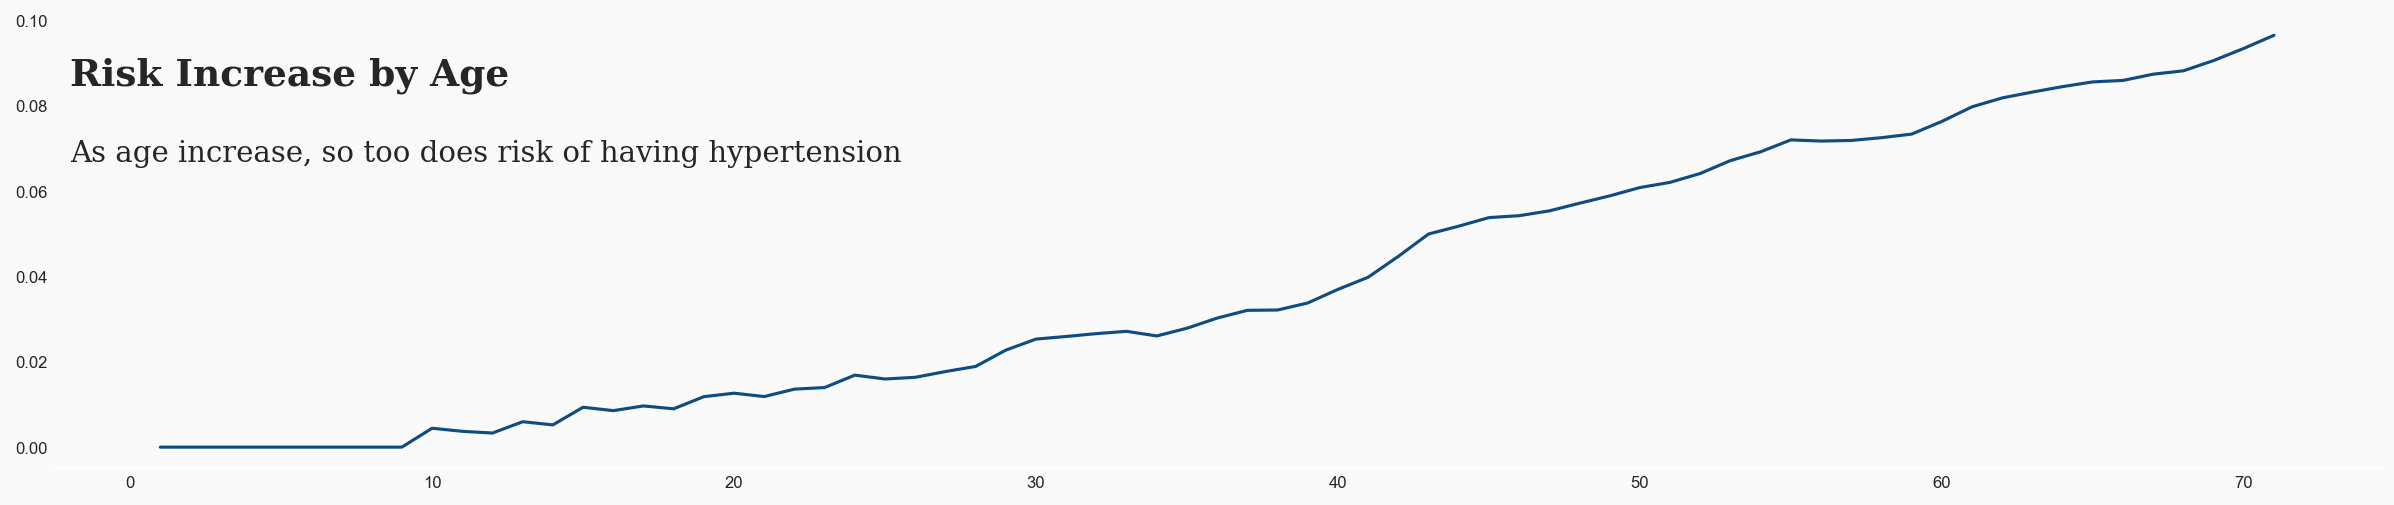

In [32]:
background_color = "#fafafa"
fig = plt.figure(figsize=(20, 10), dpi=150,facecolor=background_color)
gs = fig.add_gridspec(2, 1)
gs.update(wspace=0.11, hspace=0.5)
ax0 = fig.add_subplot(gs[0, 0])
ax0.set_facecolor(background_color)


df['age'] = df['age'].astype(int)

rate = []
for i in range(df['age'].min(), df['age'].max()):
    rate.append(df[df['age'] < i]['hypertension'].sum() / len(df[df['age'] < i]['hypertension']))

sns.lineplot(data=rate,color='#0f4c81',ax=ax0)

for s in ["top","right","left"]:
    ax0.spines[s].set_visible(False)

ax0.tick_params(axis='both', which='major', labelsize=8)
ax0.tick_params(axis=u'both', which=u'both',length=0)

ax0.text(-2,0.085,'Risk Increase by Age',fontsize=18,fontfamily='serif',fontweight='bold')
ax0.text(-2,0.067,'As age increase, so too does risk of having hypertension',fontsize=14,fontfamily='serif')


plt.show()

<font color='blood red'><font size="5">Distribution plot of BMI<br /><br />

In [33]:
bmi = list(df['bmi'].values)
hist_data = [bmi]
group_labels = ["bmi"]
colors = ['#1f77b4']
fig = ff.create_distplot(hist_data,group_labels,show_hist = True,colors=colors)
fig.update_layout({"template":"plotly_dark"})
fig.show()

# Label: Hypertension

In [34]:
df['hypertension'].value_counts()

0    2692
1     299
Name: hypertension, dtype: int64

<font color='blood red'><font size="5"><a href='#2'>As mentioned earlier, we have an imbalanced data.</a><br /><br />
<font color='blood red'><font size="3">Standard ML methods, such as Decision Tree and Logistic Regression, tend to deviate from the majority class and tend to ignore the minority class.<br /><br />
    They tend to only predict the majority class, hence have a significant misclassification of the minority class as compared to the majority class. 
    
<font color='blood red'><font size="3"> So, we should to do <font color=#FF1493>SMOTE (Synthetic Minority Over-sampling Technique)</font> - one of the most commonly used resampling techniques to solve the imbalance problem.

<a id='3'></a>
<div>
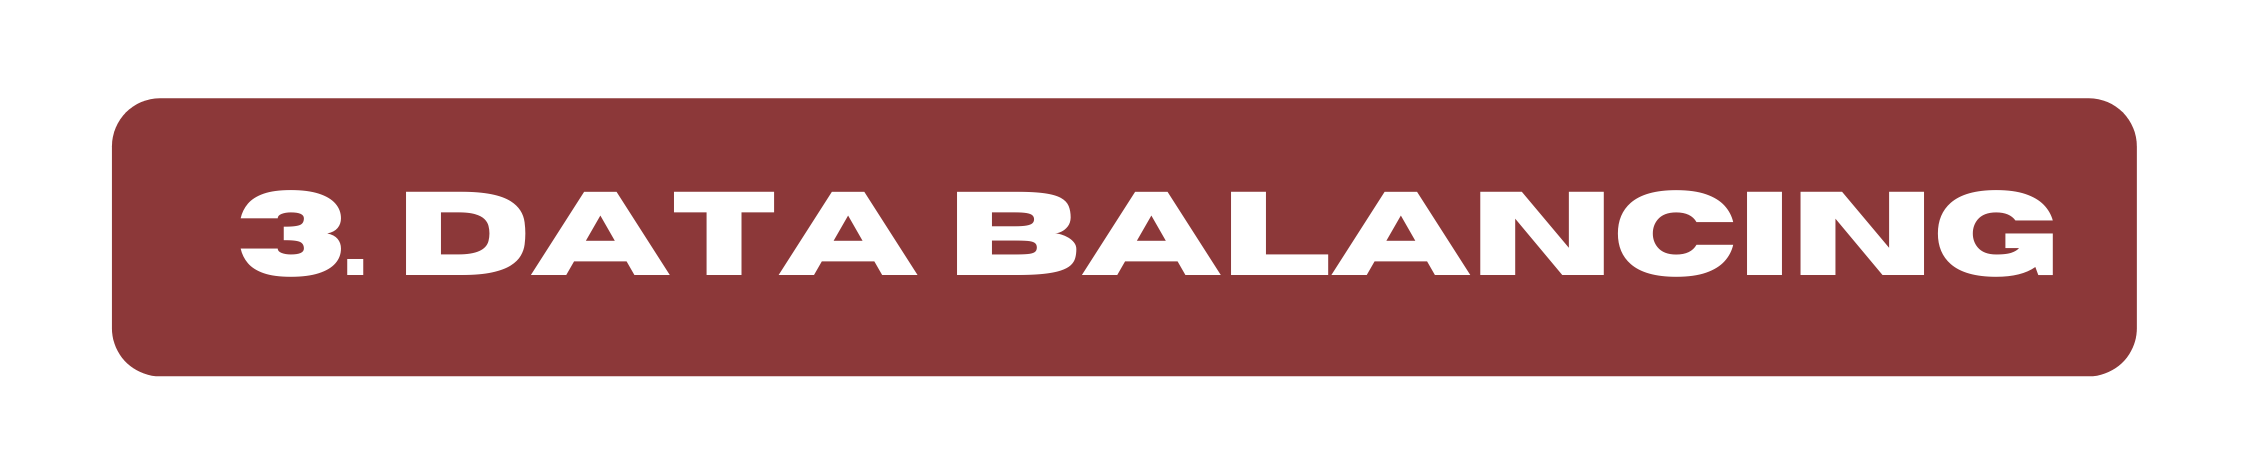
</div>

<font color=#4B0082><font size="5">First we normalise the data, we chose not to standardise because we are unsure if our features follow a Gaussian distribution

In [39]:
from sklearn.preprocessing import MinMaxScaler

df1 = df.copy()
X=df1.copy().drop(['hypertension','id', 'gender','ever_married', 'work_type','Residence_type','smoking_status'],axis=1)
y=df1['hypertension']

In [40]:
  
X[['age','avg_glucose_level','bmi']] = StandardScaler().fit_transform(X[['age','avg_glucose_level','bmi']])
X.head()

age  heart_disease  avg_glucose_level       bmi  stroke  gender_Cat  \
2  1.756908              1           0.605573  0.542820       1           1   
3  0.107565              0           3.396769  0.861004       1           0   
4  1.703704              0           3.520280 -0.880636       1           0   
6  1.437681              1          -0.925717 -0.311254       1           1   
7  1.171658              0           0.112808 -1.081594       1           0   

   married_Cat  worktype_Cat  Residence_type_Cat  smoking_status_Cat  
2            1             2                   0                   0  
3            1             2                   1                   1  
4            1             3                   0                   0  
6            1             2                   0                   0  
7            0             2                   1                   0

# SMOTE (Synthetic Minority Over-sampling Technique)

In [41]:
y.head()

2    0
3    0
4    1
6    1
7    0
Name: hypertension, dtype: int64

<font color=#1E90FF><font size="5">We train test split first then use the synthetic sampling technique

In [42]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

X_balanced, X_test, Y_balanced, y_test = train_test_split(X,y, test_size = 0.2)
X_train_balanced, Y_train_balanced = smote.fit_resample(X_balanced, Y_balanced)

X_train_balanced_list=X_train_balanced.columns.values.tolist()

print(X_train_balanced_list)

['age', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke', 'gender_Cat', 'married_Cat', 'worktype_Cat', 'Residence_type_Cat', 'smoking_status_Cat']


In [43]:
X_train_balanced.shape

(4306, 10)

In [44]:
from collections import Counter
print(Counter(Y_train_balanced))
print(Counter(y_test))

Counter({0: 2153, 1: 2153})
Counter({0: 539, 1: 60})


<font color=#B22222><font size="5">Our training data is now balanced and normalised!

In [45]:
X_train_balanced.describe()

age  heart_disease  avg_glucose_level          bmi  \
count  4306.000000    4306.000000        4306.000000  4306.000000   
mean      0.309104       0.039712           0.034910     0.181703   
std       0.959569       0.195304           1.036188     0.955421   
min      -1.967414       0.000000          -1.561226    -2.538543   
25%      -0.319226       0.000000          -0.717559    -0.512212   
50%       0.361786       0.000000          -0.110069     0.174396   
75%       1.118453       0.000000           0.549802     0.749803   
max       1.863318       1.000000           3.570283     2.887335   

            stroke   gender_Cat  married_Cat  worktype_Cat  \
count  4306.000000  4306.000000  4306.000000   4306.000000   
mean      0.040873     0.362517     0.779378      1.919879   
std       0.198019     0.480783     0.414714      0.887042   
min       0.000000     0.000000     0.000000      0.000000   
25%       0.000000     0.000000     1.000000      2.000000   
50%       0.000000     0.000000     1.000000      2.000000   
75%       0.000000     1.000000     1.000000      2.000000   
max       1.000000     1.000000     1.000000      4.000000   

       Residence_type_Cat  smoking_status_Cat  
count         4306.000000         4306.000000  
mean             0.441245            0.444032  
std              0.496593            0.496915  
min              0.000000            0.000000  
25%              0.000000            0.000000  
50%              0.000000            0.000000  
75%              1.000000            1.000000  
max              1.000000            1.000000

<a id='4'></a>
<div>
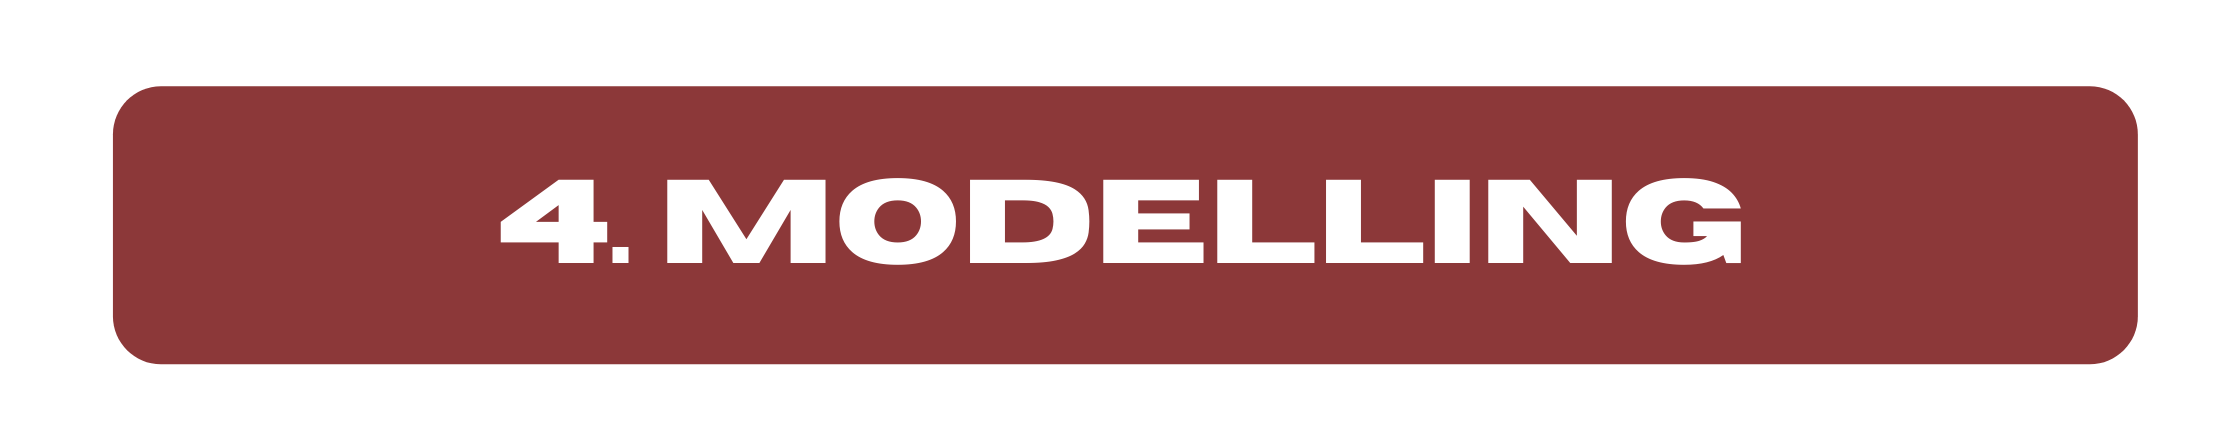
</div>

<font color='blood red'><font size="5">which should we focus on?

- <font color='blood red'><font size="3"> Precision = (True Positive) / (Total predicted positive)
   
- <font color='blood red'><font size="3"> Recall = (True Positive) / (Total actual positive)

- <font color='blood red'><font size="3"> F1 = 2* ( precision * recall) / (precision + recall)

<font color='blood red'><font size="4"> Since we are predicting hypertension, the impact of False Negatives are much more undesirable as compared to False Positives. <font color=#191970><font size="4">It is worse for a patient to go undiagnosed and fail to receive proper treatment, than to have a minor false scare about having hypertension. (when one does not have it)
Thus it makes sense to focus more on Recall instead of Precision.

<font color='blood red'><font size="4"> However, precision can tell us how accurate/precise our model is out of those predicted positive, how many are actual positive, which is an important aspect too.

<font color='blood red'><font size="4"> F1 score allows us to seek a balance between Precision and Recall. While it may seem like a good measure, this means that we are compromising on Recall.
    
<font color='blood red'><font size="4"> Going back to the reasons why we wanted to do this project, hypertension is like a <font color=#228B22><font size="5">'silent killer'</font><font color='blood red'><font size="4">, thus our priority should be on minimising the number of False Negatives.
    
<font color=#FF4500><font size="5">
Hence, we focus on <font color=#FF69B4><font size="7">Recall</font><font color=#FF4500> scores.

<a id='4.1'></a>
<div>
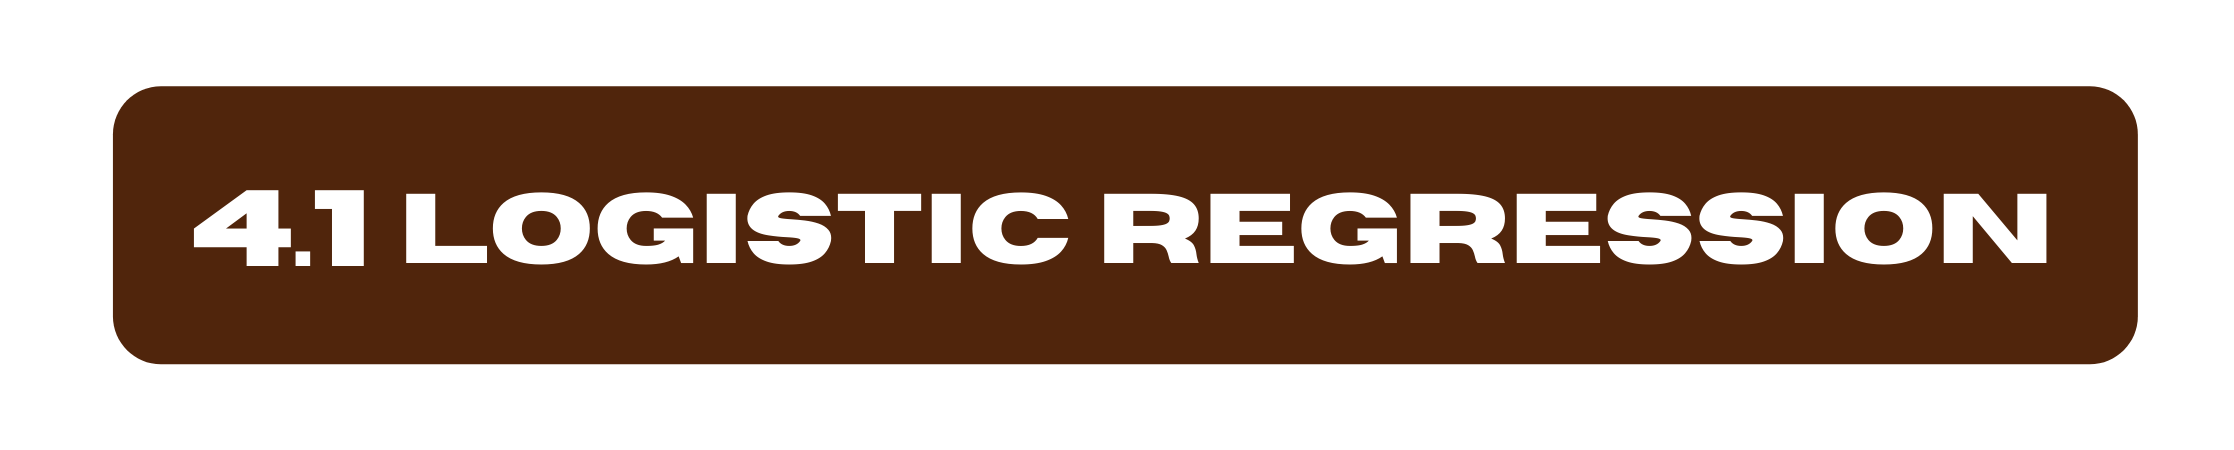
</div>

<font color=#8A2BE2><font size="4">Wikipedia:<br>
Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable.<br><br>
Mathematically, a binary logistic model has a dependent variable with two possible values, such as pass/fail which is represented by an indicator variable, where the two values are labeled "0" and "1".

<font color=#8B4513><font size="4">First we use feature selection method<font color=#4169E1><font size="4"> RFE (Recursive Feature Elimination)<font color=#8B4513><font size="4"> to deduce the more important features by reoving the weakest features. We select n=4 features in this case

In [46]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=600)
rfe = RFE(estimator=model, n_features_to_select=4)
fit = rfe.fit(X_train_balanced, Y_train_balanced)
print("Num Features: %s" % (fit.n_features_))
features = {'Features': X_train_balanced_list,'Selected Features':fit.support_ ,'Feature Ranking':fit.ranking_}
rfe_df = pd.DataFrame(features)
rfe_df

Num Features: 4


Features  Selected Features  Feature Ranking
0                 age               True                1
1       heart_disease               True                1
2   avg_glucose_level              False                6
3                 bmi               True                1
4              stroke              False                3
5          gender_Cat              False                7
6         married_Cat              False                2
7        worktype_Cat              False                5
8  Residence_type_Cat               True                1
9  smoking_status_Cat              False                4

In [47]:
df = pd.concat([X_train_balanced, Y_train_balanced],axis = 1)

<font color='blood red'><font size="4">Features picked by RFE:<font color=#9370DB> age, heart disease, bmi, Residence type<br /><br />

## Classification report with model wrapped with RFE (4 features):

In [48]:
y_pred = fit.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.65      0.77       539
           1       0.18      0.68      0.28        60

    accuracy                           0.65       599
   macro avg       0.56      0.67      0.53       599
weighted avg       0.87      0.65      0.72       599



## Classification report with standard model with all features:

In [52]:
fit1 = model.fit(X_train_balanced, Y_train_balanced)
y_pred1 = fit1.predict(X_test)
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.95      0.68      0.79       539
           1       0.18      0.65      0.29        60

    accuracy                           0.68       599
   macro avg       0.57      0.67      0.54       599
weighted avg       0.87      0.68      0.74       599



### Feature importance from coefficient size:

In [53]:
ft_imp = pd.DataFrame(columns = ['feature', 'importance (abs coef)'], index = range(10))
for i in range(len(ft_imp.index)):
    ft_imp.iloc[i, 0] = X_train_balanced.columns.to_list()[i]
ft_imp['importance (abs coef)'] = abs(model.coef_)[0]
ft_imp = ft_imp.sort_values('importance (abs coef)', ascending = False)
ft_imp[0:12].style.background_gradient(cmap = 'Blues')

<font color='blood red'><font size="4">As to be seen, the 4 most important features in this case is: <font color=#9370DB>age, heart disease, bmi and Residence type.<br><br>
<font color='blood red'><font size="4">As compared to the one's selcted by RFE, the common features are: stroke and residence type

## Confusion matrix of model with all features: 

<AxesSubplot:>

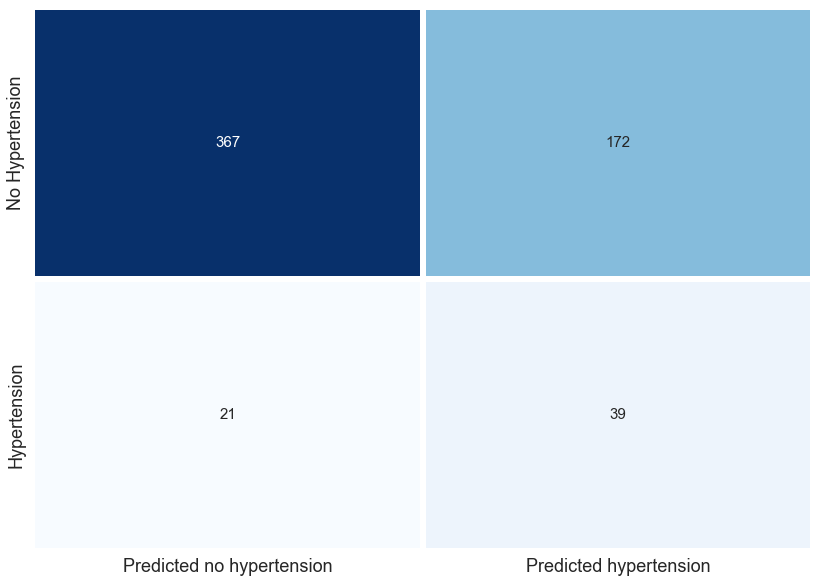

In [54]:
plt.rcParams['figure.figsize'] = 14, 10
lr_cm = confusion_matrix(y_test, y_pred1)
sns.heatmap(lr_cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No Hypertension', 'Hypertension'], xticklabels = ['Predicted no hypertension', 'Predicted hypertension'])

<font color='blood red'><font size="5">as seen from our classification report,
- <font color='blood red'><font size="4"> Recall score is mediocre

<a id='4.2'></a>
<div>
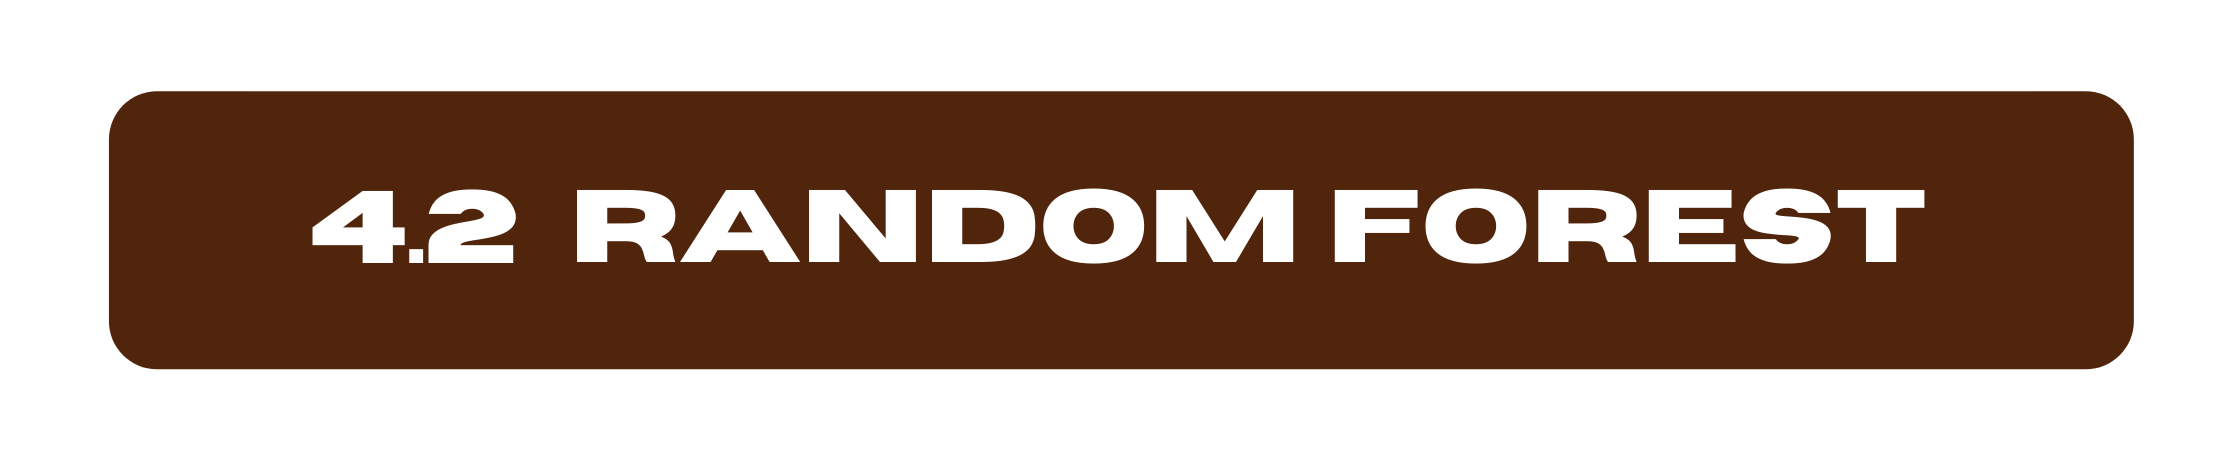
</div>

<font color='blood red'><font size="5">Prior to predicting hypertension with random forest, a simple decision tree model will first be observed

<font color=#228B22><font size="4">A Decision Tree is a supervised machine learning algorithm that can be used for both classification and regression problems. A decision tree is simply a series of sequential decisions made to reach a specific result.<br><br>
 But often, a single tree is not sufficient for producing effective results. <br><br>
 Random Forest is a tree-based machine learning algorithm that leverages the power of multiple decision trees for making decisions.<br><br>
 The Random Forest Algorithm combines the output of multiple (randomly created) Decision Trees to generate the final output.

In [55]:
from sklearn.tree import DecisionTreeClassifier
#constructing a tree of max depth = 2
tree_dpt2 = DecisionTreeClassifier(max_depth = 2)

In [56]:
tree_dpt2.fit(X_train_balanced, Y_train_balanced)

DecisionTreeClassifier(max_depth=2)

In [57]:
from sklearn.tree import plot_tree

[Text(334.8, 543.6, 'age <= -0.158\ngini = 0.5\nsamples = 4306\nvalue = [2153, 2153]\nclass = N'),
 Text(167.4, 326.16, 'bmi <= 0.275\ngini = 0.305\nsamples = 1317\nvalue = [1070, 247]\nclass = N'),
 Text(83.7, 108.72000000000003, 'gini = 0.106\nsamples = 787\nvalue = [743, 44]\nclass = N'),
 Text(251.10000000000002, 108.72000000000003, 'gini = 0.473\nsamples = 530\nvalue = [327, 203]\nclass = N'),
 Text(502.20000000000005, 326.16, 'bmi <= 0.125\ngini = 0.462\nsamples = 2989\nvalue = [1083, 1906]\nclass = Y'),
 Text(418.5, 108.72000000000003, 'gini = 0.5\nsamples = 1333\nvalue = [649, 684]\nclass = Y'),
 Text(585.9, 108.72000000000003, 'gini = 0.387\nsamples = 1656\nvalue = [434, 1222]\nclass = Y')]

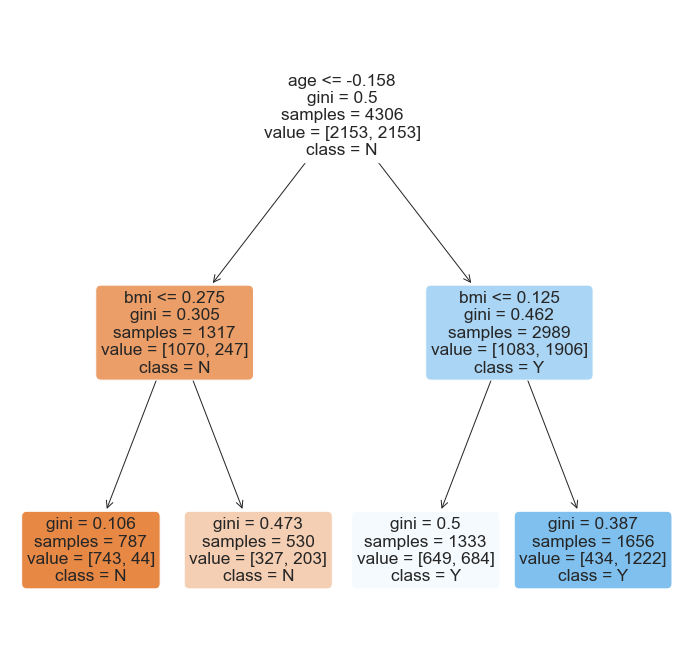

In [58]:
f = plt.figure(figsize=(12,12))
plot_tree(tree_dpt2, filled=True, rounded=True,
         feature_names=X_train_balanced.columns,
         class_names=["N", "Y"])

In [59]:
y_pred = tree_dpt2.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.47      0.64       539
           1       0.16      0.87      0.26        60

    accuracy                           0.51       599
   macro avg       0.56      0.67      0.45       599
weighted avg       0.89      0.51      0.60       599



<font color='blood red'><font size="5">as seen from our classification report,
- <font color='blood red'><font size="4"> Recall for hypertension = 0 is very bad, but for hypertension = 1 is quite good

<AxesSubplot:>

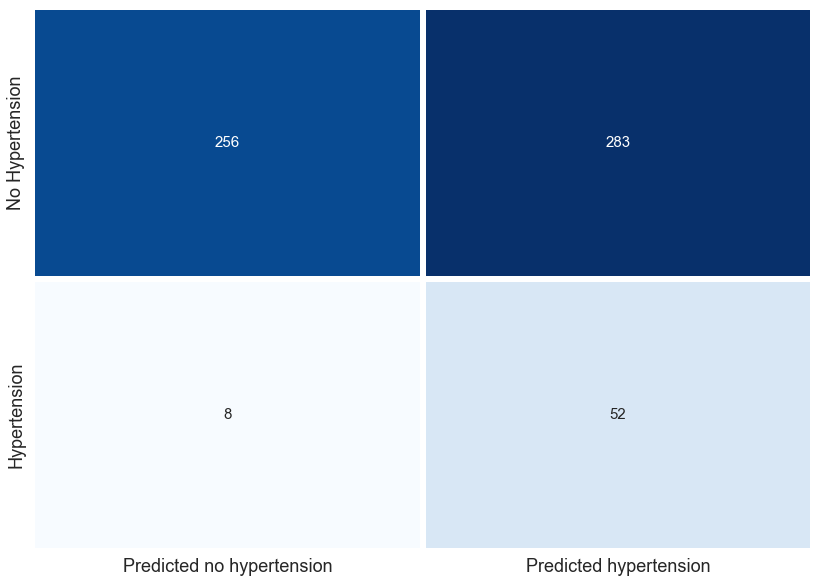

In [71]:
y_pred = tree_dpt2.predict(X_test)

dt_cm = confusion_matrix(y_test, y_pred)
sns.heatmap(dt_cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No Hypertension', 'Hypertension'], xticklabels = ['Predicted no hypertension', 'Predicted hypertension'])


In [72]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=10)
fit = model.fit(X_train_balanced, Y_train_balanced)


In [73]:
model.score(X_test, y_test)

0.7929883138564274

In [74]:
y_pred=model.predict(X_test)

## Feature importance from Random Forest Classifier:

In [75]:
f_imp2 = pd.DataFrame(columns = ['feature', 'importance'], index = range(10))
for i in range(len(f_imp2.index)):
    f_imp2.iloc[i, 0] = X_train_balanced.columns.to_list()[i]
f_imp2['importance'] =model.feature_importances_
f_imp2 = f_imp2.sort_values('importance', ascending = False)
f_imp2[0:12].style.background_gradient(cmap = 'Blues')

<font color=#800080><font size="4">Random Forest picked up: <font color=#800000><font size="4">age, bmi, average glucose level and worktype <font color=#800080><font size="4">as top 4 important features <br>


### Classification Report 

In [76]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88       539
           1       0.12      0.17      0.14        60

    accuracy                           0.79       599
   macro avg       0.51      0.51      0.51       599
weighted avg       0.82      0.79      0.81       599



<AxesSubplot:>

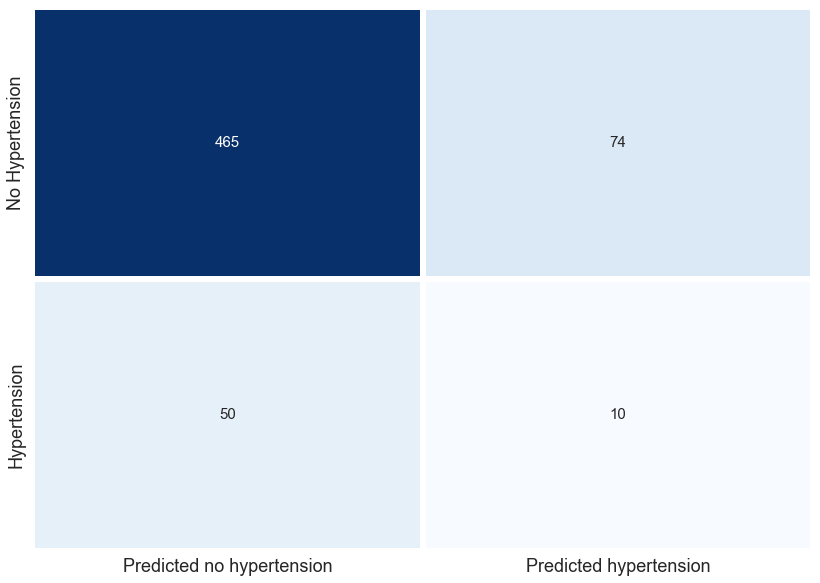

In [77]:
rf_cm = confusion_matrix(y_test, y_pred)
sns.heatmap(rf_cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No Hypertension', 'Hypertension'], xticklabels = ['Predicted no hypertension', 'Predicted hypertension'])


<font color='blood red'><font size="5">as seen from our classification report,
- <font color='blood red'><font size="4"> Recall for hypertension = 1 is very bad, bu for hypertension = 0 is quite good. Opposite of the Decision Tree. 
-<font color='blood red'><font size="4">However, accuracy for Random FOrest is much better than Decision Tree
  


<a id='4.3'></a>
<div>
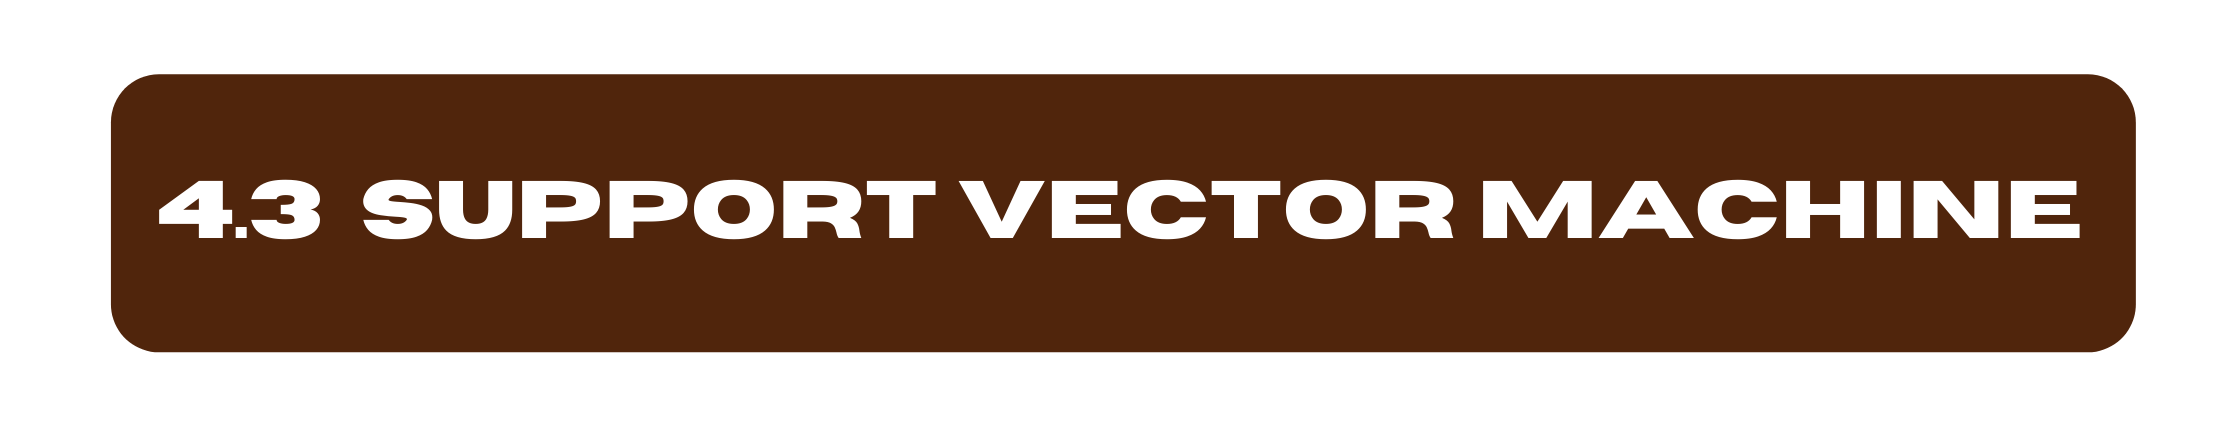
</div>

# Support Vector Machine

<font color=#778899><font size="4">Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection. They are effective in high dimensional spaces.

In [108]:
svc = SVC()
svc.fit(X_train_balanced, Y_train_balanced)
y_pred = svc.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.70      0.80       539
           1       0.18      0.60      0.28        60

    accuracy                           0.69       599
   macro avg       0.56      0.65      0.54       599
weighted avg       0.86      0.69      0.75       599



<AxesSubplot:>

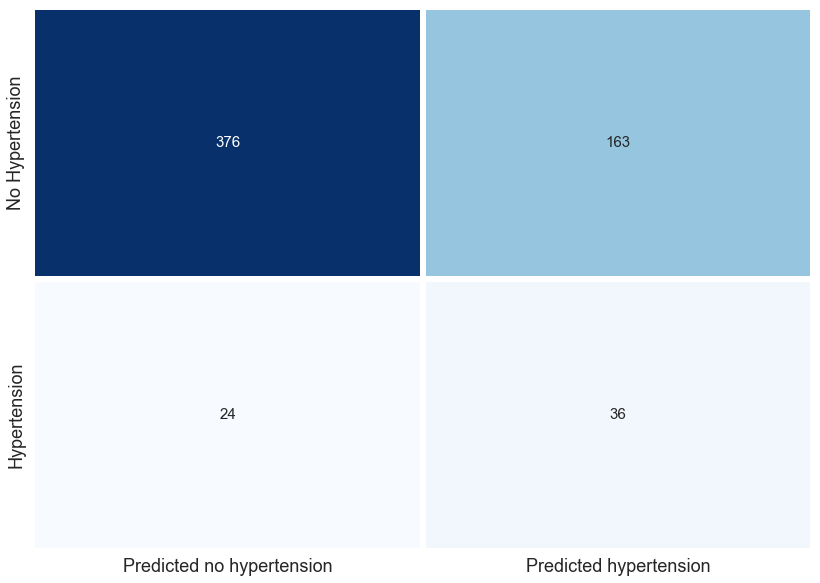

In [79]:
svc_cm = confusion_matrix(y_test, y_pred)
sns.heatmap(svc_cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No Hypertension', 'Hypertension'], xticklabels = ['Predicted no hypertension', 'Predicted hypertension'])

<font color='blood red'><font size="5">as seen from our classification report,
- <font color='blood red'><font size="4"> Recall for hypertension=1 is quote good
- <font color='blood red'><font size="4"> However, Recall for hypertension=0 is mediocre


<a id='4.4'></a>
<div>
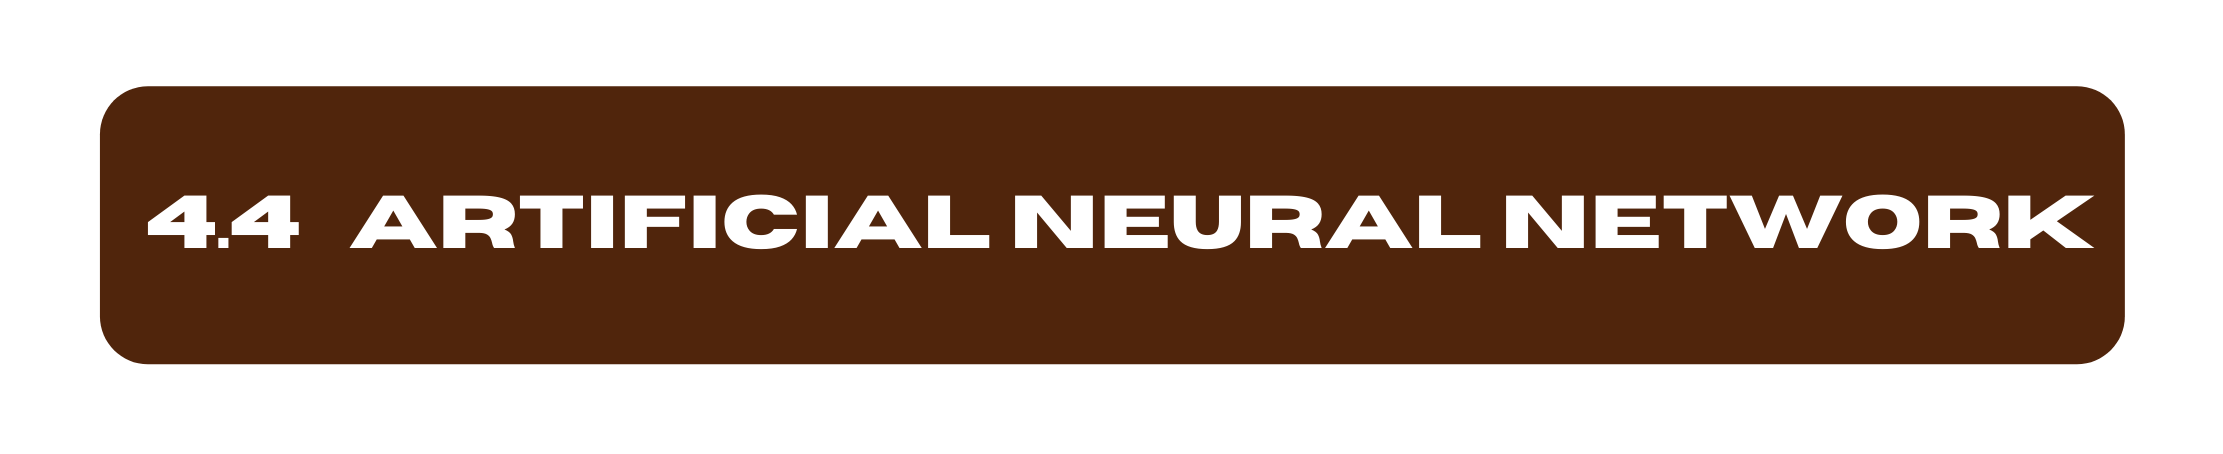
</div>

# Artificial Neural Network

<font color=#800000><font size="4">
Wikipedia:
Artificial neural networks (ANNs), usually simply called neural networks (NNs), are computing systems inspired by the biological neural networks that constitute animal brains.<br><br>
<font color=#C71585><font size="4">
An ANN is based on a collection of connected units or nodes called artificial neurons, which loosely model the neurons in a biological brain. Each connection, like the synapses in a biological brain, can transmit a signal to other neurons. An artificial neuron receives a signal then processes it and can signal neurons connected to it. The "signal" at a connection is a real number, and the output of each neuron is computed by some non-linear function of the sum of its inputs. The connections are called edges. <br><br>
<font color=#A0522D><font size="4">
Neurons and edges typically have a weight that adjusts as learning proceeds. The weight increases or decreases the strength of the signal at a connection. Neurons may have a threshold such that a signal is sent only if the aggregate signal crosses that threshold. Typically, neurons are aggregated into layers. Different layers may perform different transformations on their inputs. Signals travel from the first layer (the input layer), to the last layer (the output layer), possibly after traversing the layers multiple times.

In [172]:
import tensorflow as tf
from tensorflow import keras

#the line below fixes kernal appears to have died problem
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [179]:
dropout = 0.2
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(X_train_balanced.shape[-1],)),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dropout(dropout),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dropout(dropout),         
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dropout(dropout),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dropout(dropout),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(
    optimizer=opt,
    loss='binary_crossentropy',
    metrics=['accuracy']
)


<font color=#00008B><font size="5">For this Multilayer Perceptron, we include 5 Dense layers. We also include a dropout of 0.2 to combat overfitting

In [180]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 10)                0         
_________________________________________________________________
dense_35 (Dense)             (None, 10)                110       
_________________________________________________________________
dropout_28 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_36 (Dense)             (None, 8)                 88        
_________________________________________________________________
dropout_29 (Dropout)         (None, 8)                 0         
_________________________________________________________________
dense_37 (Dense)             (None, 6)                 54        
_________________________________________________________________
dropout_30 (Dropout)         (None, 6)                

In [181]:

history1 = model.fit(X_train_balanced, Y_train_balanced, epochs=1000, batch_size=X_train_balanced.size//200, verbose=2, 
                      validation_data=(X_test, y_test))


Train on 4306 samples, validate on 599 samples
Epoch 1/1000
4306/4306 - 1s - loss: 0.6909 - accuracy: 0.5516 - val_loss: 0.7213 - val_accuracy: 0.5559
Epoch 2/1000
4306/4306 - 0s - loss: 0.6717 - accuracy: 0.6259 - val_loss: 0.6807 - val_accuracy: 0.6828
Epoch 3/1000
4306/4306 - 0s - loss: 0.6577 - accuracy: 0.6382 - val_loss: 0.6650 - val_accuracy: 0.7045
Epoch 4/1000
4306/4306 - 0s - loss: 0.6504 - accuracy: 0.6530 - val_loss: 0.6478 - val_accuracy: 0.7329
Epoch 5/1000
4306/4306 - 0s - loss: 0.6376 - accuracy: 0.6633 - val_loss: 0.6427 - val_accuracy: 0.7078
Epoch 6/1000
4306/4306 - 0s - loss: 0.6293 - accuracy: 0.6758 - val_loss: 0.6669 - val_accuracy: 0.6461
Epoch 7/1000
4306/4306 - 0s - loss: 0.6273 - accuracy: 0.6753 - val_loss: 0.6163 - val_accuracy: 0.6878
Epoch 8/1000
4306/4306 - 0s - loss: 0.6133 - accuracy: 0.6897 - val_loss: 0.6674 - val_accuracy: 0.6578
Epoch 9/1000
4306/4306 - 0s - loss: 0.6159 - accuracy: 0.6867 - val_loss: 0.5793 - val_accuracy: 0.7262
Epoch 10/1000
430

4306/4306 - 0s - loss: 0.5314 - accuracy: 0.7436 - val_loss: 0.5249 - val_accuracy: 0.6861
Epoch 78/1000
4306/4306 - 0s - loss: 0.5314 - accuracy: 0.7506 - val_loss: 0.5221 - val_accuracy: 0.6778
Epoch 79/1000
4306/4306 - 0s - loss: 0.5211 - accuracy: 0.7550 - val_loss: 0.5439 - val_accuracy: 0.6678
Epoch 80/1000
4306/4306 - 0s - loss: 0.5339 - accuracy: 0.7464 - val_loss: 0.4896 - val_accuracy: 0.6594
Epoch 81/1000
4306/4306 - 0s - loss: 0.5298 - accuracy: 0.7534 - val_loss: 0.5651 - val_accuracy: 0.6544
Epoch 82/1000
4306/4306 - 0s - loss: 0.5336 - accuracy: 0.7462 - val_loss: 0.5249 - val_accuracy: 0.6644
Epoch 83/1000
4306/4306 - 0s - loss: 0.5275 - accuracy: 0.7483 - val_loss: 0.4988 - val_accuracy: 0.6845
Epoch 84/1000
4306/4306 - 0s - loss: 0.5312 - accuracy: 0.7464 - val_loss: 0.5220 - val_accuracy: 0.6628
Epoch 85/1000
4306/4306 - 0s - loss: 0.5306 - accuracy: 0.7529 - val_loss: 0.5372 - val_accuracy: 0.6644
Epoch 86/1000
4306/4306 - 0s - loss: 0.5197 - accuracy: 0.7592 - val_

Epoch 155/1000
4306/4306 - 0s - loss: 0.5146 - accuracy: 0.7627 - val_loss: 0.4787 - val_accuracy: 0.7379
Epoch 156/1000
4306/4306 - 0s - loss: 0.5122 - accuracy: 0.7545 - val_loss: 0.5462 - val_accuracy: 0.7095
Epoch 157/1000
4306/4306 - 0s - loss: 0.5113 - accuracy: 0.7631 - val_loss: 0.5002 - val_accuracy: 0.6828
Epoch 158/1000
4306/4306 - 0s - loss: 0.5162 - accuracy: 0.7620 - val_loss: 0.5095 - val_accuracy: 0.6795
Epoch 159/1000
4306/4306 - 0s - loss: 0.5189 - accuracy: 0.7603 - val_loss: 0.5407 - val_accuracy: 0.6694
Epoch 160/1000
4306/4306 - 0s - loss: 0.5205 - accuracy: 0.7587 - val_loss: 0.4972 - val_accuracy: 0.6861
Epoch 161/1000
4306/4306 - 0s - loss: 0.5193 - accuracy: 0.7622 - val_loss: 0.5266 - val_accuracy: 0.6861
Epoch 162/1000
4306/4306 - 0s - loss: 0.5152 - accuracy: 0.7657 - val_loss: 0.4911 - val_accuracy: 0.6995
Epoch 163/1000
4306/4306 - 0s - loss: 0.5132 - accuracy: 0.7610 - val_loss: 0.5396 - val_accuracy: 0.6828
Epoch 164/1000
4306/4306 - 0s - loss: 0.5174 -

Epoch 233/1000
4306/4306 - 0s - loss: 0.5073 - accuracy: 0.7629 - val_loss: 0.5098 - val_accuracy: 0.7346
Epoch 234/1000
4306/4306 - 0s - loss: 0.5093 - accuracy: 0.7608 - val_loss: 0.5240 - val_accuracy: 0.7346
Epoch 235/1000
4306/4306 - 0s - loss: 0.5130 - accuracy: 0.7627 - val_loss: 0.5205 - val_accuracy: 0.7379
Epoch 236/1000
4306/4306 - 0s - loss: 0.5135 - accuracy: 0.7638 - val_loss: 0.4934 - val_accuracy: 0.7396
Epoch 237/1000
4306/4306 - 0s - loss: 0.5183 - accuracy: 0.7541 - val_loss: 0.5039 - val_accuracy: 0.7496
Epoch 238/1000
4306/4306 - 0s - loss: 0.5243 - accuracy: 0.7464 - val_loss: 0.5534 - val_accuracy: 0.7179
Epoch 239/1000
4306/4306 - 0s - loss: 0.5076 - accuracy: 0.7657 - val_loss: 0.5207 - val_accuracy: 0.6694
Epoch 240/1000
4306/4306 - 0s - loss: 0.5187 - accuracy: 0.7620 - val_loss: 0.5593 - val_accuracy: 0.6528
Epoch 241/1000
4306/4306 - 0s - loss: 0.5066 - accuracy: 0.7545 - val_loss: 0.4897 - val_accuracy: 0.6878
Epoch 242/1000
4306/4306 - 0s - loss: 0.5196 -

Epoch 311/1000
4306/4306 - 0s - loss: 0.5210 - accuracy: 0.7538 - val_loss: 0.5173 - val_accuracy: 0.6644
Epoch 312/1000
4306/4306 - 0s - loss: 0.5141 - accuracy: 0.7606 - val_loss: 0.5179 - val_accuracy: 0.6895
Epoch 313/1000
4306/4306 - 0s - loss: 0.5048 - accuracy: 0.7636 - val_loss: 0.5047 - val_accuracy: 0.6828
Epoch 314/1000
4306/4306 - 0s - loss: 0.5127 - accuracy: 0.7585 - val_loss: 0.5045 - val_accuracy: 0.6995
Epoch 315/1000
4306/4306 - 0s - loss: 0.5098 - accuracy: 0.7575 - val_loss: 0.5093 - val_accuracy: 0.6962
Epoch 316/1000
4306/4306 - 0s - loss: 0.5106 - accuracy: 0.7601 - val_loss: 0.5118 - val_accuracy: 0.6811
Epoch 317/1000
4306/4306 - 0s - loss: 0.5199 - accuracy: 0.7566 - val_loss: 0.5156 - val_accuracy: 0.6845
Epoch 318/1000
4306/4306 - 0s - loss: 0.5104 - accuracy: 0.7689 - val_loss: 0.5063 - val_accuracy: 0.6811
Epoch 319/1000
4306/4306 - 0s - loss: 0.5143 - accuracy: 0.7599 - val_loss: 0.5284 - val_accuracy: 0.6728
Epoch 320/1000
4306/4306 - 0s - loss: 0.5209 -

Epoch 389/1000
4306/4306 - 0s - loss: 0.5233 - accuracy: 0.7596 - val_loss: 0.5440 - val_accuracy: 0.7062
Epoch 390/1000
4306/4306 - 0s - loss: 0.5178 - accuracy: 0.7587 - val_loss: 0.4960 - val_accuracy: 0.7346
Epoch 391/1000
4306/4306 - 0s - loss: 0.5116 - accuracy: 0.7550 - val_loss: 0.5241 - val_accuracy: 0.6895
Epoch 392/1000
4306/4306 - 0s - loss: 0.4988 - accuracy: 0.7636 - val_loss: 0.5286 - val_accuracy: 0.6628
Epoch 393/1000
4306/4306 - 0s - loss: 0.5120 - accuracy: 0.7617 - val_loss: 0.5244 - val_accuracy: 0.7078
Epoch 394/1000
4306/4306 - 0s - loss: 0.5019 - accuracy: 0.7624 - val_loss: 0.5051 - val_accuracy: 0.7129
Epoch 395/1000
4306/4306 - 0s - loss: 0.5141 - accuracy: 0.7610 - val_loss: 0.5397 - val_accuracy: 0.7346
Epoch 396/1000
4306/4306 - 0s - loss: 0.5145 - accuracy: 0.7589 - val_loss: 0.4841 - val_accuracy: 0.7396
Epoch 397/1000
4306/4306 - 0s - loss: 0.5223 - accuracy: 0.7557 - val_loss: 0.5278 - val_accuracy: 0.7229
Epoch 398/1000
4306/4306 - 0s - loss: 0.5228 -

Epoch 467/1000
4306/4306 - 0s - loss: 0.5195 - accuracy: 0.7520 - val_loss: 0.5096 - val_accuracy: 0.6594
Epoch 468/1000
4306/4306 - 0s - loss: 0.5211 - accuracy: 0.7411 - val_loss: 0.5316 - val_accuracy: 0.6561
Epoch 469/1000
4306/4306 - 0s - loss: 0.5379 - accuracy: 0.7346 - val_loss: 0.5113 - val_accuracy: 0.6544
Epoch 470/1000
4306/4306 - 0s - loss: 0.5357 - accuracy: 0.7378 - val_loss: 0.5234 - val_accuracy: 0.6661
Epoch 471/1000
4306/4306 - 0s - loss: 0.5281 - accuracy: 0.7438 - val_loss: 0.5066 - val_accuracy: 0.6561
Epoch 472/1000
4306/4306 - 0s - loss: 0.5226 - accuracy: 0.7445 - val_loss: 0.5460 - val_accuracy: 0.6444
Epoch 473/1000
4306/4306 - 0s - loss: 0.5262 - accuracy: 0.7427 - val_loss: 0.5241 - val_accuracy: 0.6594
Epoch 474/1000
4306/4306 - 0s - loss: 0.5203 - accuracy: 0.7485 - val_loss: 0.5340 - val_accuracy: 0.6361
Epoch 475/1000
4306/4306 - 0s - loss: 0.5214 - accuracy: 0.7462 - val_loss: 0.5025 - val_accuracy: 0.7245
Epoch 476/1000
4306/4306 - 0s - loss: 0.5178 -

Epoch 545/1000
4306/4306 - 0s - loss: 0.5226 - accuracy: 0.7508 - val_loss: 0.4740 - val_accuracy: 0.7513
Epoch 546/1000
4306/4306 - 0s - loss: 0.5020 - accuracy: 0.7636 - val_loss: 0.5393 - val_accuracy: 0.7262
Epoch 547/1000
4306/4306 - 0s - loss: 0.5091 - accuracy: 0.7629 - val_loss: 0.4958 - val_accuracy: 0.7412
Epoch 548/1000
4306/4306 - 0s - loss: 0.5056 - accuracy: 0.7636 - val_loss: 0.5055 - val_accuracy: 0.7396
Epoch 549/1000
4306/4306 - 0s - loss: 0.5089 - accuracy: 0.7629 - val_loss: 0.5068 - val_accuracy: 0.7362
Epoch 550/1000
4306/4306 - 0s - loss: 0.5194 - accuracy: 0.7673 - val_loss: 0.5017 - val_accuracy: 0.7346
Epoch 551/1000
4306/4306 - 0s - loss: 0.5107 - accuracy: 0.7594 - val_loss: 0.5071 - val_accuracy: 0.7396
Epoch 552/1000
4306/4306 - 0s - loss: 0.5142 - accuracy: 0.7620 - val_loss: 0.4918 - val_accuracy: 0.7479
Epoch 553/1000
4306/4306 - 0s - loss: 0.5125 - accuracy: 0.7557 - val_loss: 0.5100 - val_accuracy: 0.7629
Epoch 554/1000
4306/4306 - 0s - loss: 0.5115 -

Epoch 623/1000
4306/4306 - 0s - loss: 0.5155 - accuracy: 0.7455 - val_loss: 0.5378 - val_accuracy: 0.6978
Epoch 624/1000
4306/4306 - 0s - loss: 0.5046 - accuracy: 0.7466 - val_loss: 0.5307 - val_accuracy: 0.6845
Epoch 625/1000
4306/4306 - 0s - loss: 0.5185 - accuracy: 0.7501 - val_loss: 0.5027 - val_accuracy: 0.7696
Epoch 626/1000
4306/4306 - 0s - loss: 0.5150 - accuracy: 0.7552 - val_loss: 0.5065 - val_accuracy: 0.7429
Epoch 627/1000
4306/4306 - 0s - loss: 0.5069 - accuracy: 0.7562 - val_loss: 0.5483 - val_accuracy: 0.6828
Epoch 628/1000
4306/4306 - 0s - loss: 0.5070 - accuracy: 0.7529 - val_loss: 0.4918 - val_accuracy: 0.7362
Epoch 629/1000
4306/4306 - 0s - loss: 0.5135 - accuracy: 0.7613 - val_loss: 0.5078 - val_accuracy: 0.7446
Epoch 630/1000
4306/4306 - 0s - loss: 0.5204 - accuracy: 0.7480 - val_loss: 0.5075 - val_accuracy: 0.6861
Epoch 631/1000
4306/4306 - 0s - loss: 0.5152 - accuracy: 0.7524 - val_loss: 0.4980 - val_accuracy: 0.7095
Epoch 632/1000
4306/4306 - 0s - loss: 0.5183 -

Epoch 701/1000
4306/4306 - 0s - loss: 0.5134 - accuracy: 0.7592 - val_loss: 0.5365 - val_accuracy: 0.7245
Epoch 702/1000
4306/4306 - 0s - loss: 0.5079 - accuracy: 0.7545 - val_loss: 0.5256 - val_accuracy: 0.7295
Epoch 703/1000
4306/4306 - 0s - loss: 0.5169 - accuracy: 0.7573 - val_loss: 0.5031 - val_accuracy: 0.7479
Epoch 704/1000
4306/4306 - 0s - loss: 0.5081 - accuracy: 0.7529 - val_loss: 0.5135 - val_accuracy: 0.7496
Epoch 705/1000
4306/4306 - 0s - loss: 0.5201 - accuracy: 0.7517 - val_loss: 0.5187 - val_accuracy: 0.7579
Epoch 706/1000
4306/4306 - 0s - loss: 0.5088 - accuracy: 0.7585 - val_loss: 0.5141 - val_accuracy: 0.7529
Epoch 707/1000
4306/4306 - 0s - loss: 0.5169 - accuracy: 0.7543 - val_loss: 0.5319 - val_accuracy: 0.7379
Epoch 708/1000
4306/4306 - 0s - loss: 0.5083 - accuracy: 0.7634 - val_loss: 0.5183 - val_accuracy: 0.7429
Epoch 709/1000
4306/4306 - 0s - loss: 0.5008 - accuracy: 0.7589 - val_loss: 0.5361 - val_accuracy: 0.6594
Epoch 710/1000
4306/4306 - 0s - loss: 0.5053 -

Epoch 779/1000
4306/4306 - 0s - loss: 0.5134 - accuracy: 0.7564 - val_loss: 0.5441 - val_accuracy: 0.6711
Epoch 780/1000
4306/4306 - 0s - loss: 0.5076 - accuracy: 0.7552 - val_loss: 0.5312 - val_accuracy: 0.6761
Epoch 781/1000
4306/4306 - 0s - loss: 0.5185 - accuracy: 0.7490 - val_loss: 0.5275 - val_accuracy: 0.6928
Epoch 782/1000
4306/4306 - 0s - loss: 0.5042 - accuracy: 0.7601 - val_loss: 0.5440 - val_accuracy: 0.6895
Epoch 783/1000
4306/4306 - 0s - loss: 0.5037 - accuracy: 0.7603 - val_loss: 0.5598 - val_accuracy: 0.6611
Epoch 784/1000
4306/4306 - 0s - loss: 0.5201 - accuracy: 0.7464 - val_loss: 0.5251 - val_accuracy: 0.6477
Epoch 785/1000
4306/4306 - 0s - loss: 0.5211 - accuracy: 0.7459 - val_loss: 0.5639 - val_accuracy: 0.6578
Epoch 786/1000
4306/4306 - 0s - loss: 0.5209 - accuracy: 0.7506 - val_loss: 0.5342 - val_accuracy: 0.6578
Epoch 787/1000
4306/4306 - 0s - loss: 0.5070 - accuracy: 0.7569 - val_loss: 0.5328 - val_accuracy: 0.6644
Epoch 788/1000
4306/4306 - 0s - loss: 0.5129 -

Epoch 857/1000
4306/4306 - 0s - loss: 0.4994 - accuracy: 0.7624 - val_loss: 0.5458 - val_accuracy: 0.6811
Epoch 858/1000
4306/4306 - 0s - loss: 0.5091 - accuracy: 0.7517 - val_loss: 0.5073 - val_accuracy: 0.6845
Epoch 859/1000
4306/4306 - 0s - loss: 0.5147 - accuracy: 0.7520 - val_loss: 0.5100 - val_accuracy: 0.6878
Epoch 860/1000
4306/4306 - 0s - loss: 0.5024 - accuracy: 0.7580 - val_loss: 0.5317 - val_accuracy: 0.6828
Epoch 861/1000
4306/4306 - 0s - loss: 0.5009 - accuracy: 0.7617 - val_loss: 0.5086 - val_accuracy: 0.6912
Epoch 862/1000
4306/4306 - 0s - loss: 0.5056 - accuracy: 0.7559 - val_loss: 0.5339 - val_accuracy: 0.6895
Epoch 863/1000
4306/4306 - 0s - loss: 0.5029 - accuracy: 0.7503 - val_loss: 0.5149 - val_accuracy: 0.6912
Epoch 864/1000
4306/4306 - 0s - loss: 0.4994 - accuracy: 0.7659 - val_loss: 0.5243 - val_accuracy: 0.6978
Epoch 865/1000
4306/4306 - 0s - loss: 0.5078 - accuracy: 0.7515 - val_loss: 0.5281 - val_accuracy: 0.6711
Epoch 866/1000
4306/4306 - 0s - loss: 0.5071 -

Epoch 935/1000
4306/4306 - 0s - loss: 0.5101 - accuracy: 0.7508 - val_loss: 0.5398 - val_accuracy: 0.6845
Epoch 936/1000
4306/4306 - 0s - loss: 0.5064 - accuracy: 0.7459 - val_loss: 0.5117 - val_accuracy: 0.6895
Epoch 937/1000
4306/4306 - 0s - loss: 0.5143 - accuracy: 0.7462 - val_loss: 0.5227 - val_accuracy: 0.6945
Epoch 938/1000
4306/4306 - 0s - loss: 0.5116 - accuracy: 0.7404 - val_loss: 0.5393 - val_accuracy: 0.7062
Epoch 939/1000
4306/4306 - 0s - loss: 0.5246 - accuracy: 0.7239 - val_loss: 0.5507 - val_accuracy: 0.7212
Epoch 940/1000
4306/4306 - 0s - loss: 0.5148 - accuracy: 0.7334 - val_loss: 0.5380 - val_accuracy: 0.7129
Epoch 941/1000
4306/4306 - 0s - loss: 0.5145 - accuracy: 0.7380 - val_loss: 0.5450 - val_accuracy: 0.6912
Epoch 942/1000
4306/4306 - 0s - loss: 0.5140 - accuracy: 0.7397 - val_loss: 0.5278 - val_accuracy: 0.6861
Epoch 943/1000
4306/4306 - 0s - loss: 0.5149 - accuracy: 0.7348 - val_loss: 0.5446 - val_accuracy: 0.6928
Epoch 944/1000
4306/4306 - 0s - loss: 0.5200 -

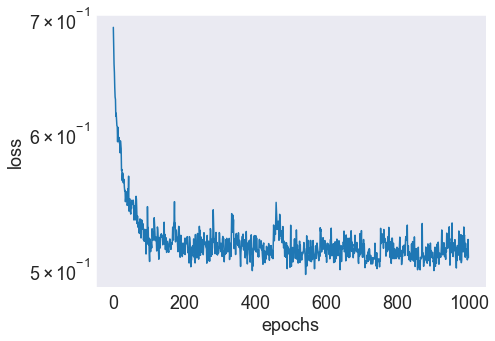

In [182]:
plt.rcParams['figure.figsize'] = 7, 5
grid = sns.lineplot(data = history1.history['loss'])
grid.set(yscale='log')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

<font color=#00008B><font size="5">We have a pretty standard loss vs epoch curve. It is good to see loss decreasing as the number of eochs increases.

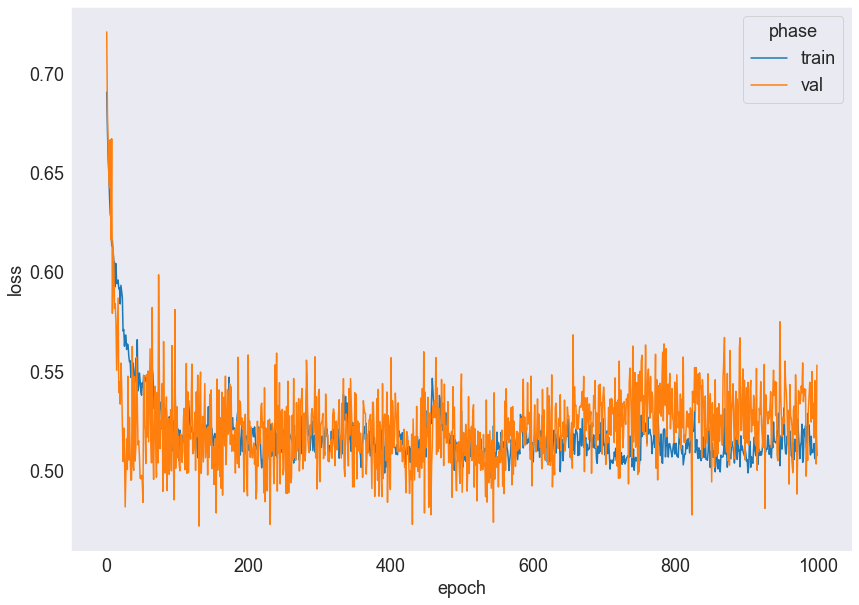

In [183]:

plt.rcParams['figure.figsize'] = 14, 10

df = pd.DataFrame(history1.history)
df['epoch'] = df.index
val_cols = [x for x in df.columns if x.startswith('val')]
df_val = df[val_cols+['epoch']]
df.drop(columns=val_cols, inplace=True)
df_val.rename(columns={col: col.split('val_')[-1] for col in df_val.columns}, inplace=True)
df['phase'] = 'train'
df_val['phase'] = 'val'
hist_df = pd.concat([df, df_val], ignore_index=True)

fig, axes = plt.subplots()

sns.lineplot(data = hist_df, x='epoch', y='loss', hue='phase')

plt.show()


<font color=#00008B><font size="4">The validation loss vs epoch curve is seen to be fluctuting quite a bit. This suggests that there is still a certain degree of overfitting. We might be able to combat this by using early stopping, increasing dropout even further or by reducing model complexity. 
<br>
<font color=#FF7F50><font size="4"> However, further throrough tuning is needed to find the "sweet spot".

In [184]:
y_pred = model.predict(X_test)
print(classification_report(y_test, np.around(y_pred)))

              precision    recall  f1-score   support

           0       0.94      0.71      0.81       539
           1       0.19      0.60      0.28        60

    accuracy                           0.70       599
   macro avg       0.56      0.65      0.55       599
weighted avg       0.87      0.70      0.75       599



<AxesSubplot:>

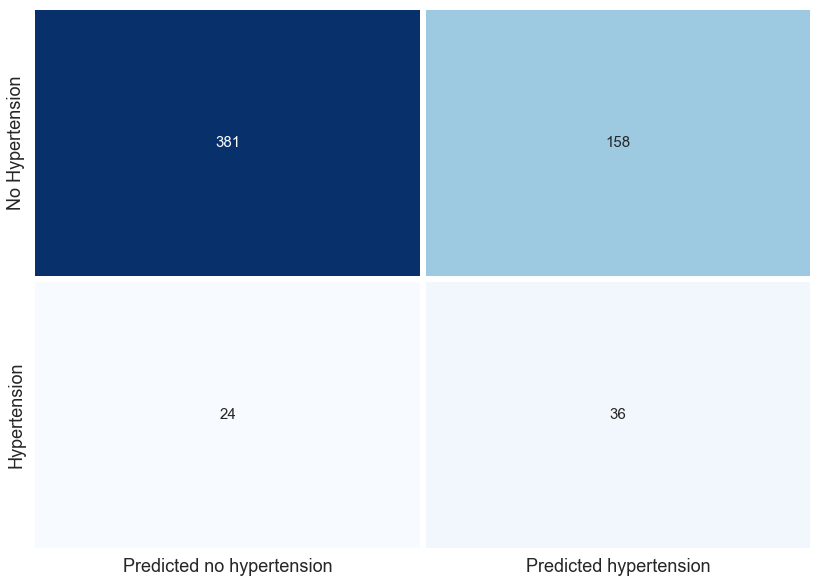

In [185]:
y_pred = model.predict(X_test)
ann_cm = confusion_matrix(y_test, np.around(y_pred))
sns.heatmap(ann_cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No Hypertension', 'Hypertension'], xticklabels = ['Predicted no hypertension', 'Predicted hypertension'])

<font color='blood red'><font size="5">as seen from our classification report,
- <font color='blood red'><font size="4"> Our recall score for hypertension=0 is decent. 
-<font color='blood red'><font size="4">But for hyertension = 1 Recall score is mediocre.
  

<a id='4.5'></a>
<div>
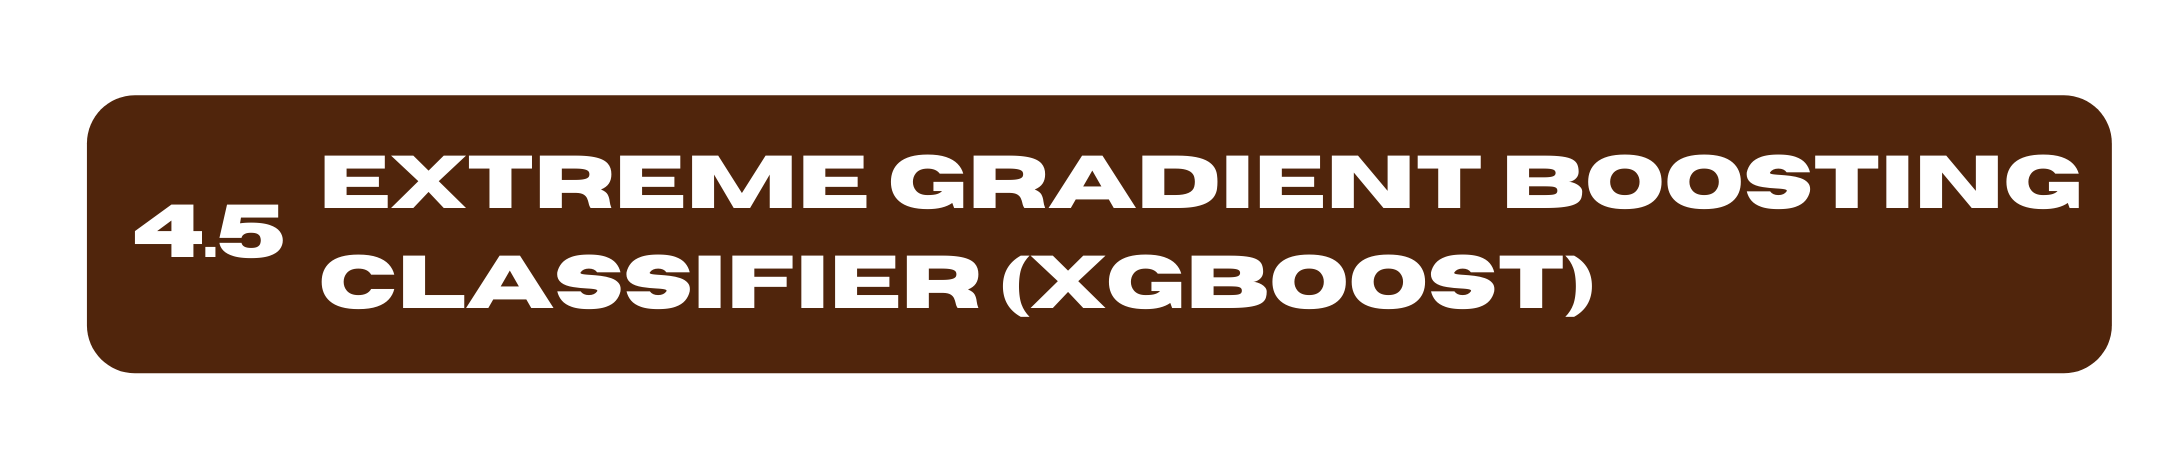
</div>

# eXtreme Gradient Boosting Classifier (XGBoost)

<font color=#B22222><font size="4">
Gradient boosting is a machine learning technique used in regression and classification tasks, among others. It gives a prediction model in the form of an ensemble of weak prediction models, which are typically decision trees. When a decision tree is the weak learner, the resulting algorithm is called gradient-boosted trees; it usually outperforms random forest.<br><br>
<font color=#8B008B><font size="4">
XGBoost initially started as a research project by Tianqi Chen as part of the Distributed (Deep) Machine Learning Community (DMLC) group. Initially, it began as a terminal application which could be configured using a libsvm configuration file. It became well known in the ML competition circles after its use in the winning solution of the Higgs Machine Learning Challenge.

In [112]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state = 22, max_depth = 5, objective = 'binary:logistic', eval_metric = 'logloss')
xgb.fit(X_train_balanced, Y_train_balanced)
y_pred = xgb.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.87      0.88       539
           1       0.09      0.12      0.10        60

    accuracy                           0.79       599
   macro avg       0.49      0.49      0.49       599
weighted avg       0.82      0.79      0.80       599



In [113]:
f_imp3 = pd.DataFrame(columns = ['feature', 'importance'], index = range(10))
for i in range(len(f_imp3.index)):
    f_imp3.iloc[i, 0] = X_train_balanced.columns.to_list()[i]
f_imp3['importance'] = xgb.feature_importances_
f_imp3 = f_imp3.sort_values('importance', ascending = False)
f_imp3[0:12].style.background_gradient(cmap = 'Blues')

<font color=#800080><font size="4">XGBoost picked up: <font color=#800000><font size="4">age, marriage status, heart disease and Residence type <font color=#800080><font size="4">as top 4 important features <br>


## If we use RFE wrapper on XGBoost:

In [114]:
rfe3 = RFE(estimator=xgb, n_features_to_select=4)
fit3 = rfe3.fit(X_train_balanced, Y_train_balanced)
print("Num Features: %s" % (fit3.n_features_))
features = {'Features': X_train_balanced_list,'Selected Features':fit3.support_ ,'Feature Ranking':fit3.ranking_}
rfe_df3 = pd.DataFrame(features)
rfe_df3

Num Features: 4


Features  Selected Features  Feature Ranking
0                 age               True                1
1       heart_disease               True                1
2   avg_glucose_level              False                7
3                 bmi              False                2
4              stroke              False                4
5          gender_Cat              False                6
6         married_Cat               True                1
7        worktype_Cat              False                3
8  Residence_type_Cat              False                5
9  smoking_status_Cat               True                1

In [115]:
y_pred3 = fit3.predict(X_test)
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       539
           1       0.26      0.10      0.14        60

    accuracy                           0.88       599
   macro avg       0.58      0.53      0.54       599
weighted avg       0.84      0.88      0.86       599



## Confusion Matrix of model using all featuers (No RFE):

<AxesSubplot:>

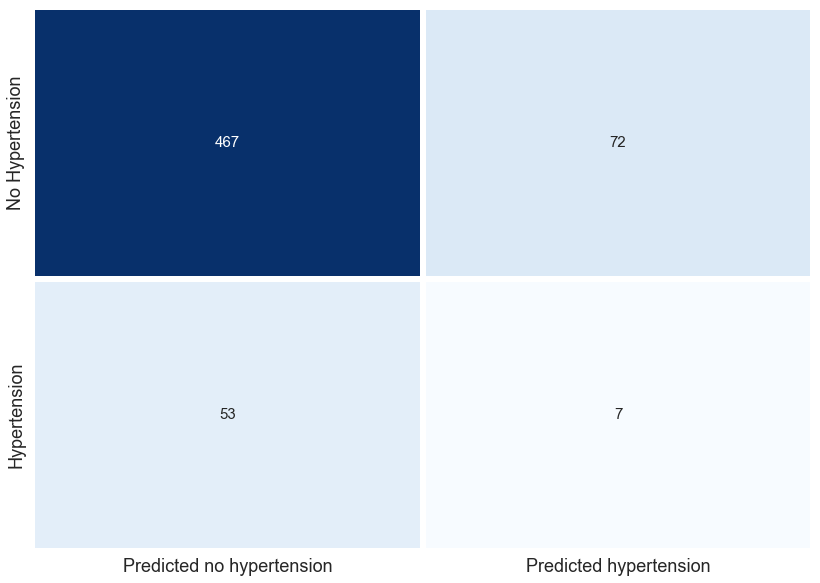

In [116]:
svc_cm = confusion_matrix(y_test, y_pred)
sns.heatmap(svc_cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No Hypertension', 'Hypertension'], xticklabels = ['Predicted no hypertension', 'Predicted hypertension'])

<font color='blood red'><font size="5">as seen from our classification report,
- <font color='blood red'><font size="4"> our recall score for hypertension = 0 is very good but very bad for hypertension = 1


# K Nearest Neighbours


<font color=#5F9EA0><font size="4">In k-NN classification, the output is a class membership. An object is classified by a plurality vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). <br>
    If k = 1, then the object is simply assigned to the class of that single nearest neighbor.

In [117]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn.fit(X_train_balanced, Y_train_balanced)
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.74      0.82       539
           1       0.16      0.43      0.23        60

    accuracy                           0.71       599
   macro avg       0.54      0.59      0.53       599
weighted avg       0.85      0.71      0.76       599



<AxesSubplot:>

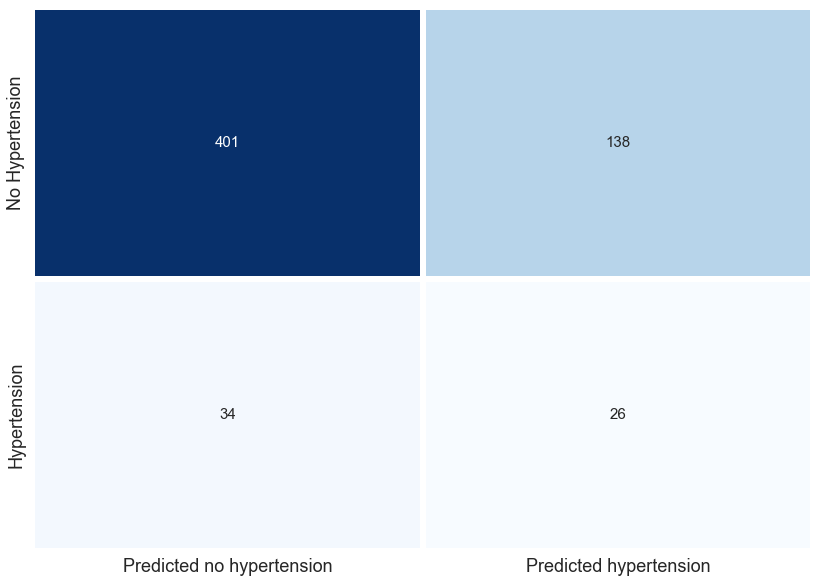

In [118]:
svc_cm = confusion_matrix(y_test, y_pred)
sns.heatmap(svc_cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No Hypertension', 'Hypertension'], xticklabels = ['Predicted no hypertension', 'Predicted hypertension'])

<font color='blood red'><font size="5">as seen from our classification report,
- <font color='blood red'><font size="4"> our recall score for hypertension = 0 is decent but for hypertension = 1 recall is not good


<a id='5'></a>
<div>
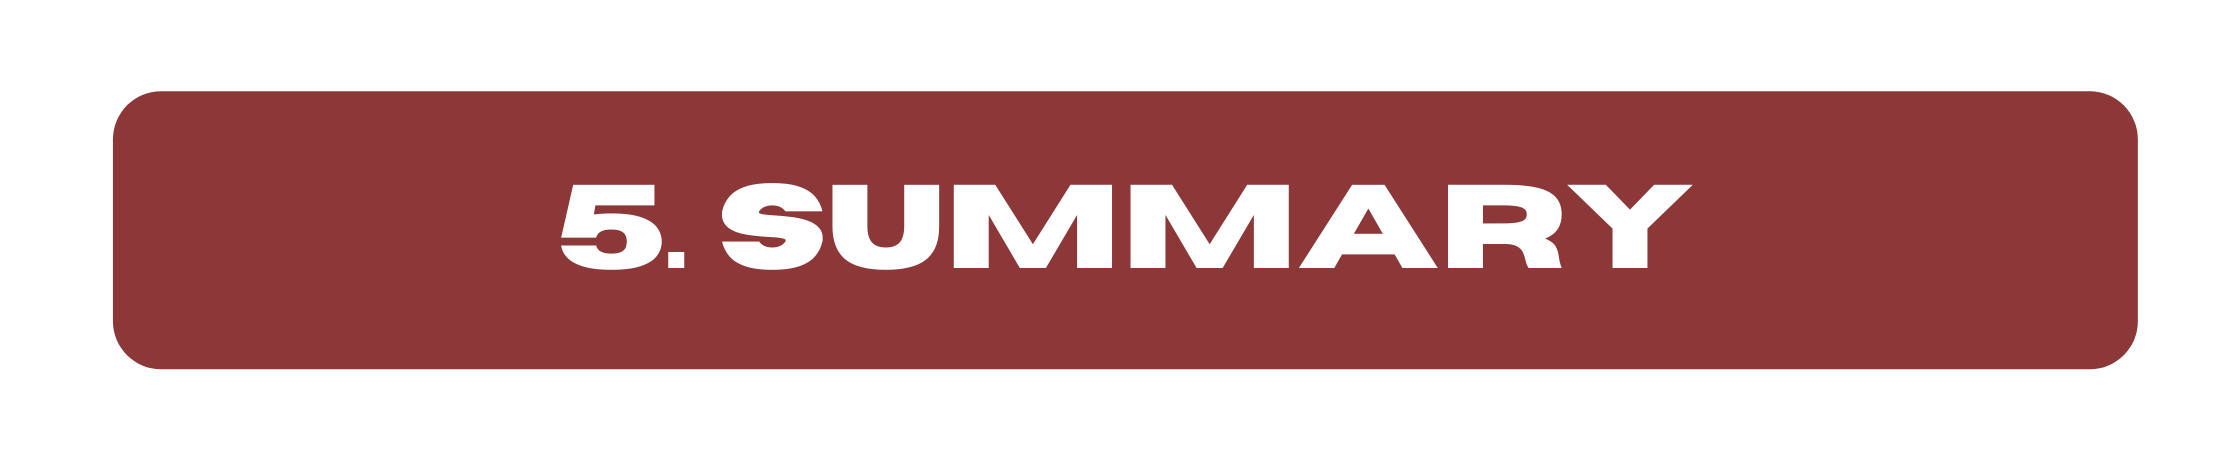
</div>

<font color='blood red'><font size="4">Based on the insights of every model we have used Random Forest seems to have the highest Recall score for Hypertension = 1. However, 
    
- <font color='blood red'><font size="4"> False negative values LOWEST,  Recall score HIGHEST